# CUSTOMER SEGMENTATION


In [85]:

# Importing all the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')


In [104]:
data = pd.read_csv('CustomerPurchaseData.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,8,0,0,0,0,0,0,3,11,0.0
1,8373,1979,Basic,Together,24594.0,1,0,10/12/13,94,1,...,5,0,0,0,0,0,0,3,11,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,08/08/12,31,0,...,8,0,0,0,0,0,0,3,11,0.0
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,6,0,0,0,0,0,0,3,11,0.0
4,9733,1978,Basic,Together,24882.0,1,0,09/09/12,52,1,...,6,1,0,0,0,0,0,3,11,0.0


In [105]:

# finding the missing values

data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  1
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntSnacksProds          0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response               23
dtype: int64

In [174]:
data = data.dropna()

data.isnull().sum()

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntSnacksProds         0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Age                    0
Spent                  0
Living_With            0
Children               0
Family_Size            0
Is_Parent              0
Clusters               0
dtype: int64

In [107]:

# Let's find if we have duplicate rows

data.duplicated().sum()

0

###### This proves that there are no duplicate rows present

In [108]:

# Info about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2237
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2215 non-null   int64  
 1   Year_Birth           2215 non-null   int64  
 2   Education            2215 non-null   object 
 3   Marital_Status       2215 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2215 non-null   int64  
 6   Teenhome             2215 non-null   int64  
 7   Dt_Customer          2215 non-null   object 
 8   Recency              2215 non-null   int64  
 9   MntWines             2215 non-null   int64  
 10  MntFruits            2215 non-null   int64  
 11  MntMeatProducts      2215 non-null   int64  
 12  MntFishProducts      2215 non-null   int64  
 13  MntSweetProducts     2215 non-null   int64  
 14  MntSnacksProds       2215 non-null   int64  
 15  NumDealsPurchases    2215 non-null   i

In [109]:
data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'])

print(max(data['Dt_Customer']))
print(min(data['Dt_Customer']))

2014-12-06 00:00:00
2012-01-08 00:00:00



###### This shows that the accumulated data is from 2012 to 2014


In [110]:

# This code will indicate the birth year of the respective person

data['Age'] = 2015 - data['Year_Birth']


In [111]:

# Creating another variable 'Spent' indicating the total amount spent in the span of two years.

data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntSnacksProds']


In [112]:

# Creating another variable 'Living_With' to extract the living situation of every individual and couples.

data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner','Absurd':'Alone','Widow':'Alone','YOLO':'Alone','Divorced':'Alone','Single':'Alone'})


In [113]:

# Creating another variable 'Children' to extract the total number of children.

data['Children'] = data['Kidhome'] + data['Teenhome']


In [114]:

# Creating another variable 'Family_Size'

data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']


In [115]:

# Creating a variable 'Is_Parent' to indicate parenthood status

data['Is_Parent'] = np.where(data.Children > 0 ,1, 0)


In [116]:

# Segementing education into three levels

data['Education'] = data['Education'].replace({'Basic':'Undergraduate','Cycle':'Undergraduate','Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})


In [117]:

# Dropping some of the features or variables

to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact','Z_Revenue','Year_Birth','ID']
data = data.drop(to_drop, axis=1)



In [118]:
# Let's check the data now

data.head()


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Undergraduate,7500.0,0,0,59,6,16,11,11,1,...,0,0,0,0.0,39,61,Partner,0,2,0
1,Undergraduate,24594.0,1,0,94,1,3,6,10,0,...,0,0,0,0.0,36,29,Partner,1,3,1
2,Undergraduate,9548.0,1,0,31,0,1,3,10,6,...,0,0,0,0.0,39,29,Alone,1,2,1
3,Undergraduate,28249.0,0,0,80,1,9,7,2,14,...,0,0,0,0.0,54,43,Partner,0,2,0
4,Undergraduate,24882.0,1,0,52,1,4,10,29,0,...,0,0,0,0.0,37,80,Partner,1,3,1


### DATA ANALYSIS & VISUALIZATION

In [119]:
data.shape


(2215, 29)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2237
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2215 non-null   object 
 1   Income               2215 non-null   float64
 2   Kidhome              2215 non-null   int64  
 3   Teenhome             2215 non-null   int64  
 4   Recency              2215 non-null   int64  
 5   MntWines             2215 non-null   int64  
 6   MntFruits            2215 non-null   int64  
 7   MntMeatProducts      2215 non-null   int64  
 8   MntFishProducts      2215 non-null   int64  
 9   MntSweetProducts     2215 non-null   int64  
 10  MntSnacksProds       2215 non-null   int64  
 11  NumDealsPurchases    2215 non-null   int64  
 12  NumWebPurchases      2215 non-null   int64  
 13  NumCatalogPurchases  2215 non-null   int64  
 14  NumStorePurchases    2215 non-null   int64  
 15  NumWebVisitsMonth    2215 non-null   i

In [121]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,51969.861400,0.441535,0.505643,49.024379,305.225282,26.361625,167.063205,37.651016,27.040632,43.979684,...,0.073138,0.064108,0.013544,0.009481,0.150339,46.183296,607.321445,0.947178,2.592325,0.714221
std,21526.320095,0.536886,0.544198,28.949608,337.345380,39.802036,224.311559,54.760822,41.077594,51.822660,...,0.260421,0.245001,0.115614,0.096929,0.357484,11.987000,602.925291,0.749230,0.905885,0.451887
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000,0.000000,1.000000,0.000000
25%,35284.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,69.000000,0.000000,2.000000,0.000000
50%,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,397.000000,1.000000,3.000000,1.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.500000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,1048.000000,1.000000,3.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,122.000000,2525.000000,3.000000,5.000000,1.000000


In [122]:
data.describe(include=object).T

,count,unique,top,freq
Education,2215,3,Graduate,1115
Living_With,2215,2,Partner,1429


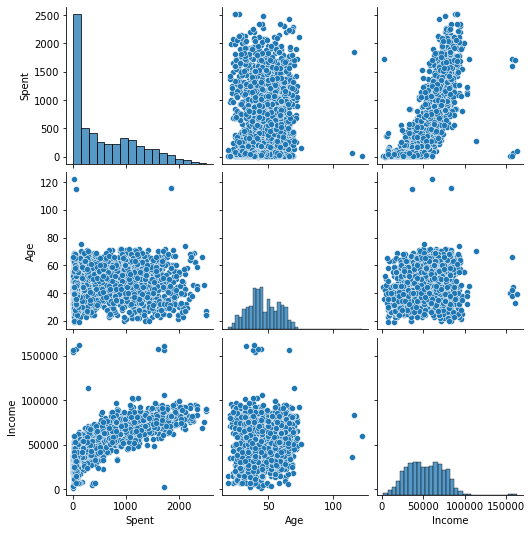

In [123]:

# Plotting a pairplot for the columns 'Spent','Age' & 'Income'

sns.pairplot(data, vars=['Spent','Age','Income'])
plt.show()


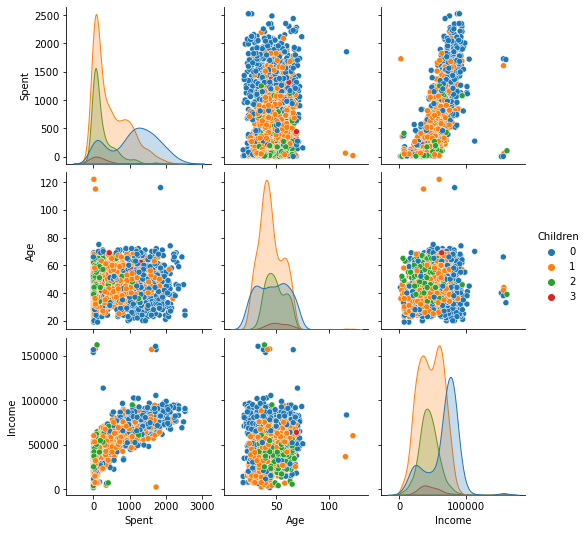

In [124]:

# Plotting a pairplot for the columns 'Spent','Age' & 'Income' w.r.t 'Children'

sns.pairplot(data, vars=['Spent','Age','Income'], hue='Children', palette='tab10')
plt.show()


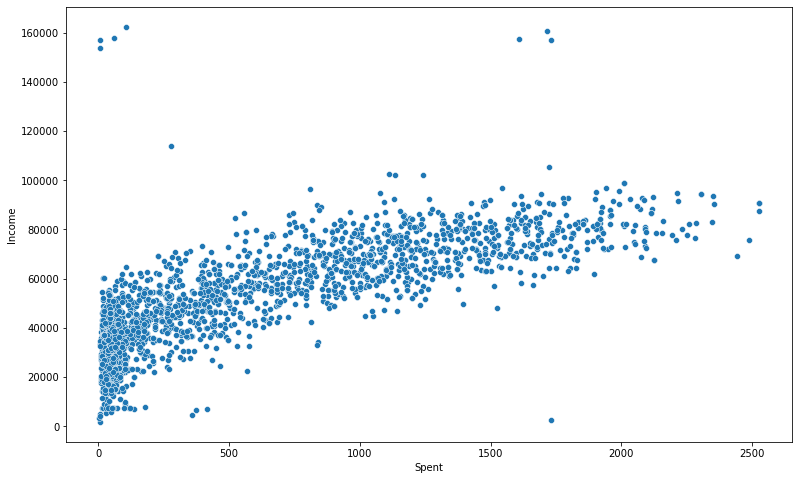

In [125]:

# Plotting a scatterplot for the variable 'Income' w.r.t 'Spent'

plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income']);
plt.show()


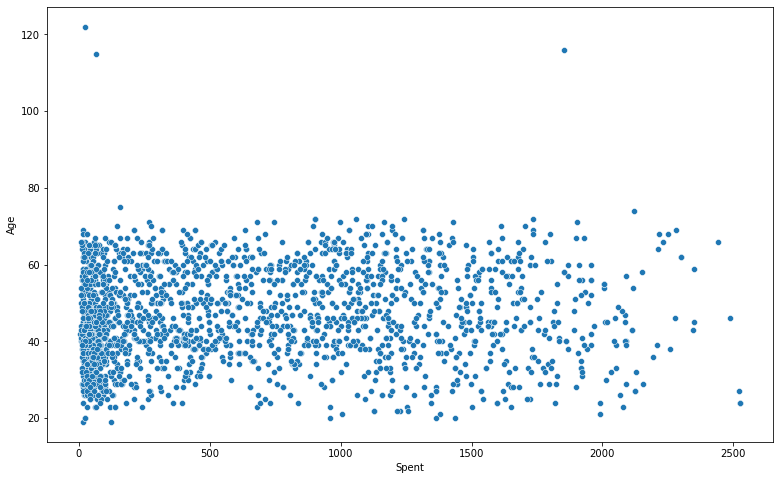

In [126]:


# Plotting a scatterplot for the variable 'Age' w.r.t 'Spent'

plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['Age']);
plt.show()



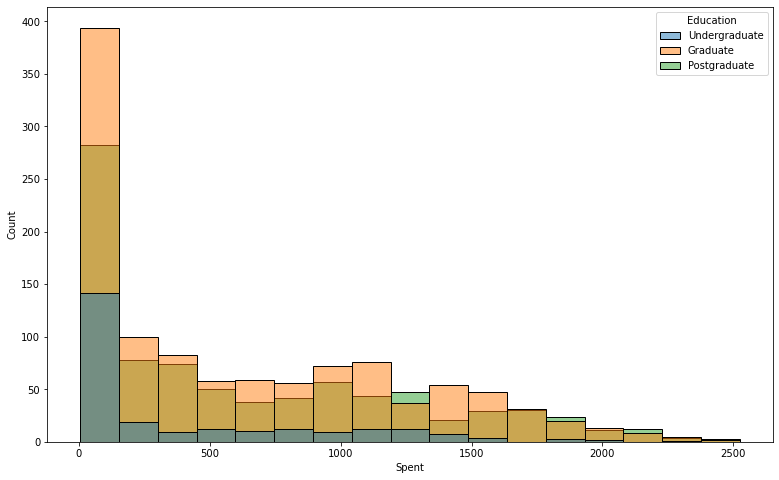

In [127]:


# Plotting a histogram for the variable 'Education' w.r.t 'Spent'

plt.figure(figsize=(13,8))
sns.histplot(x=data['Spent'], hue=data['Education']);
plt.show()


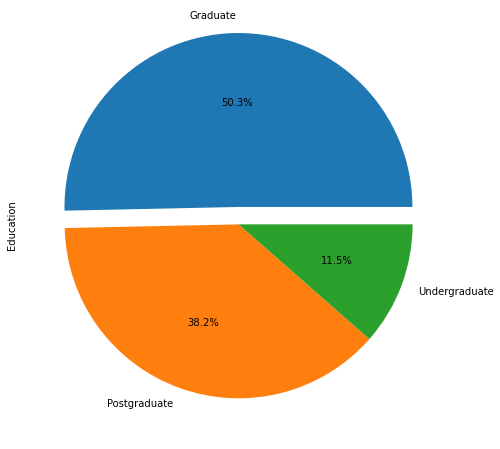

In [128]:

# Plotting a Pieplot for the variable 'Education' 

plt.figure(figsize=(13,8))
data['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%')
plt.show()


### OUTLIER DETECTION

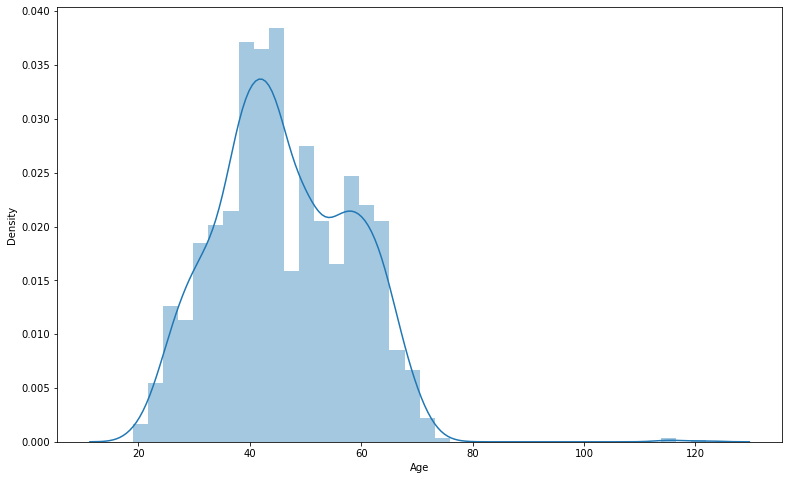

In [129]:

# Plotting a distribution plot for the variable 'Age'

plt.figure(figsize=(13,8))
sns.distplot(data.Age)
plt.show()


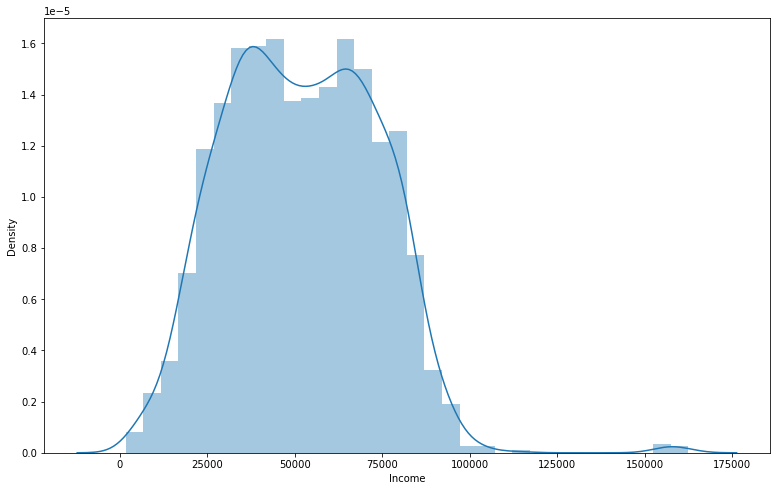

In [130]:

# Plotting a distribution plot for the variable 'Income'

plt.figure(figsize=(13,8))
sns.distplot(data.Income)
plt.show()


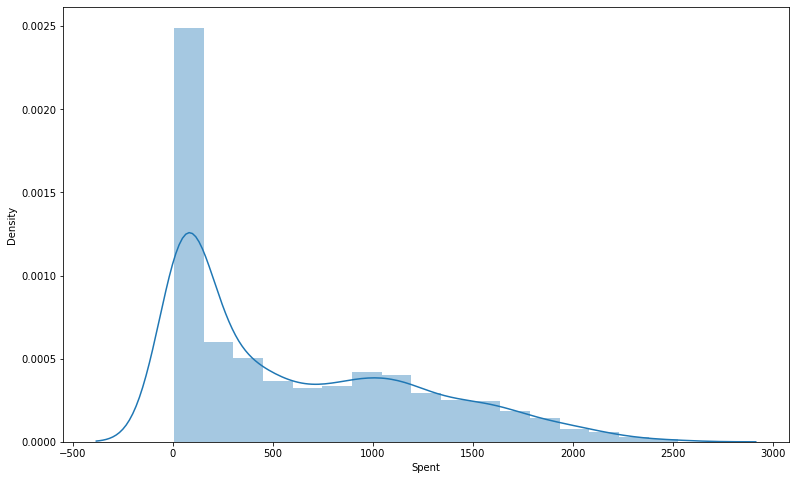

In [131]:

# Plotting a distribution plot for the variable 'Spent'

plt.figure(figsize=(13,8))
sns.distplot(data.Spent)
plt.show()


In [132]:

# To detect the outliers , we will define a function for the same.

data.head(1)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Undergraduate,7500.0,0,0,59,6,16,11,11,1,...,0,0,0,0.0,39,61,Partner,0,2,0


In [133]:
num = ['Income','Recency','Age','Spent']

In [134]:
def detect_outlier(d):
    for i in d:
        Q3, Q1 = np.percentile(data[i],[75, 25])
        IQR = Q3 - Q1
        
        ul = Q3+1.5*IQR
        ll = Q1-1.5*IQR
        
        outliers = data[i][(data[i] > ul)| (data[i] < ll)]
        print(f'------{i} outlier points ------','\n', outliers, '\n')

In [135]:
detect_outlier(num)

------Income outlier points ------ 
 388     153924.0
880     157146.0
1389    157733.0
1585    157243.0
1685    162397.0
1704    160803.0
2021    156924.0
Name: Income, dtype: float64 

------Recency outlier points ------ 
 Series([], Name: Recency, dtype: int64) 

------Age outlier points ------ 
 1625    116
2052    115
2057    122
Name: Age, dtype: int64 

------Spent outlier points ------ 
 803     2524
1368    2525
1440    2525
Name: Spent, dtype: int64 



In [136]:

# Now to delete some outlier

data = data[(data['Age']<100)]
data = data[(data['Income']<600000)]


In [137]:
data.shape

(2212, 29)

######  Categorical Variables


In [138]:
categorical = [var for var in data.columns if data[var].dtype == 'O']

In [139]:
 categorical

['Education', 'Living_With']

In [140]:
data['Living_With'].unique()

array(['Partner', 'Alone'], dtype=object)

In [141]:

# Since the variable 'Education' is an ordinal variable let's encode it with ordinal numbers.

data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1,'Postgraduate':2})


In [142]:

# Since the variable 'Living_With' is an ordinal variable let's encode it with ordinal numbers.

data['Living_With'] = data['Living_With'].map({'Alone':0, 'Partner':1})


In [143]:
data.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntSnacksProds           int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response               float64
Age                      int64
Spent                    int64
Living_With              int64
Children                 int64
Family_Size              int64
Is_Parent                int64
dtype: object

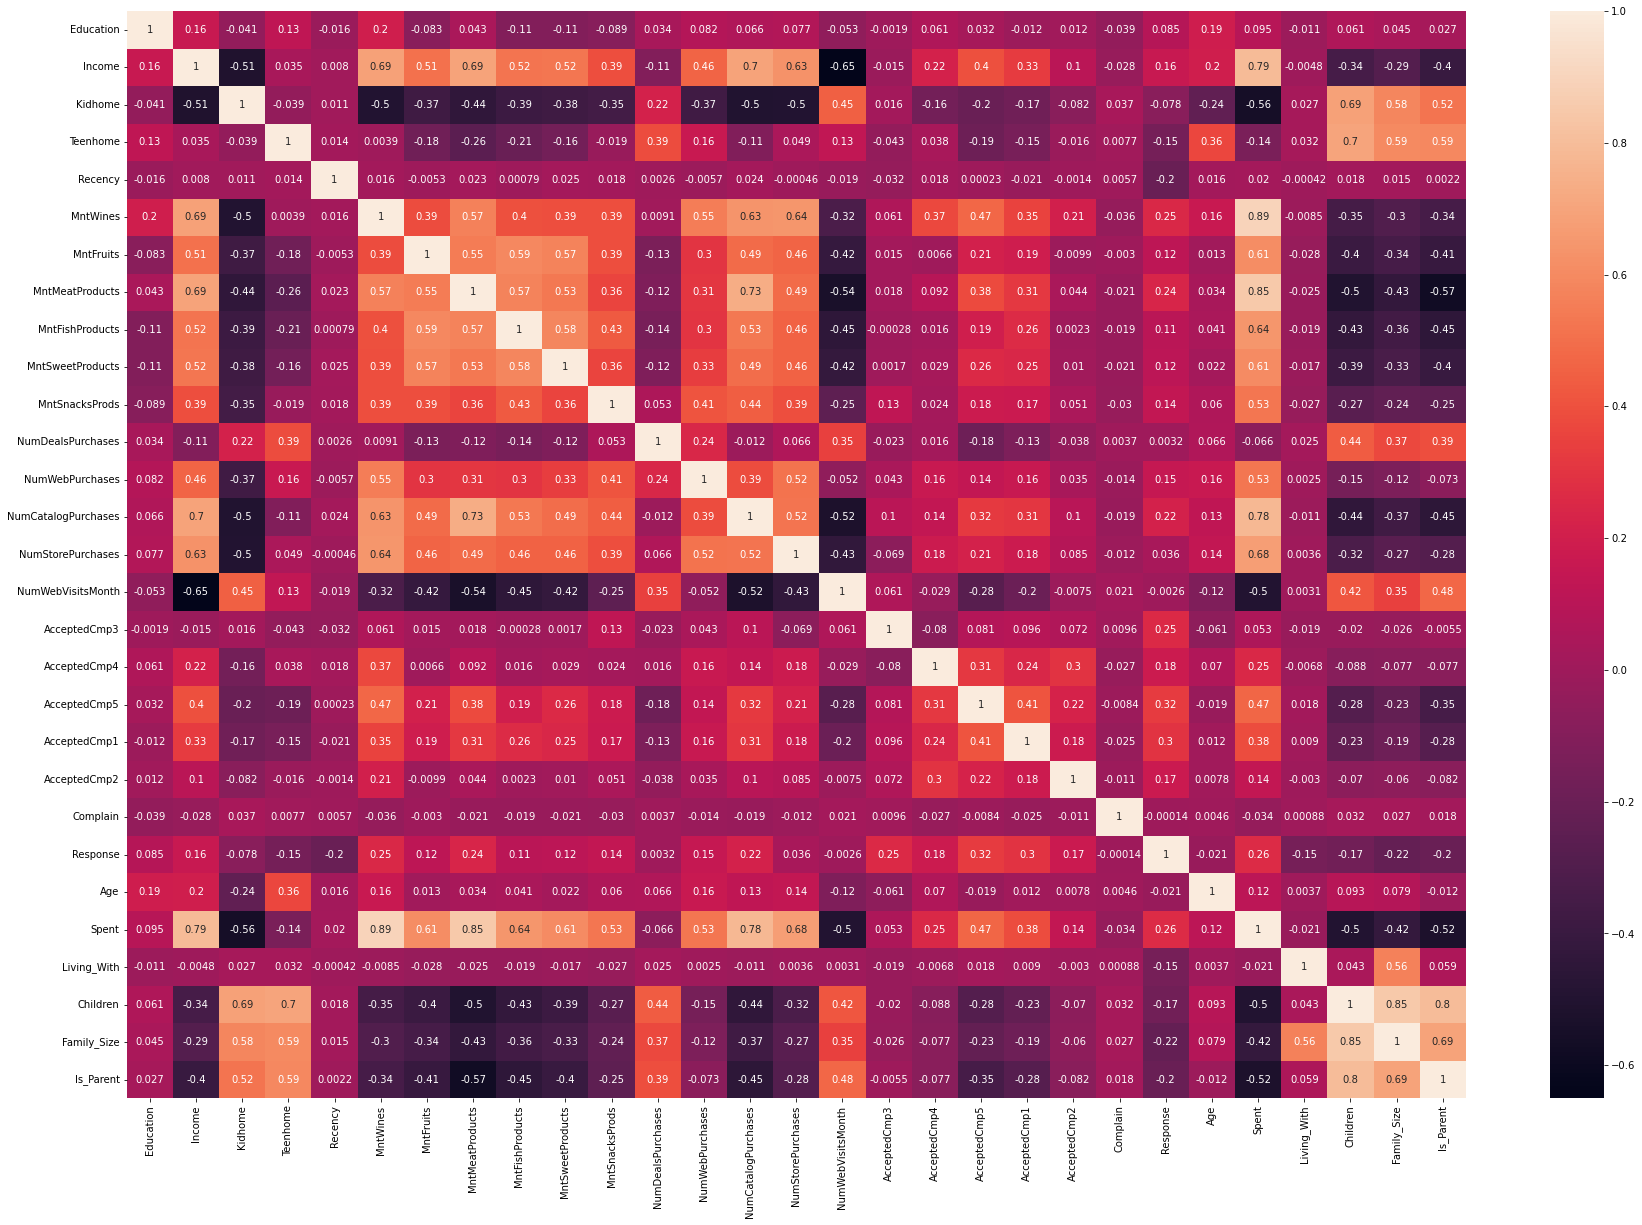

In [144]:

# Plotting a heatmap

corrmat = data.corr()

plt.figure(figsize=(30,20))
sns.heatmap(corrmat, annot= True)
plt.show()


###### Scaling

In [145]:
data_old = data.copy()

In [146]:

dele =['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response']
data = data.drop(dele, axis=1)

In [147]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [148]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-1.947299,-2.065698,-0.822754,-0.929699,0.344912,-0.887444,-0.259961,-0.695929,-0.486649,-0.634019,...,-0.761665,-0.91300,-0.863487,1.104543,-0.605725,-0.906854,0.740959,-1.264598,-0.654644,-1.581139
1,-1.947299,-1.271456,1.040021,-0.929699,1.554453,-0.902270,-0.587128,-0.718230,-0.504911,-0.658360,...,-1.126420,-0.91300,-0.863487,-0.132545,-0.862158,-0.959977,0.740959,0.069987,0.449070,0.632456
2,-1.947299,-1.970542,1.040021,-0.929699,-0.622722,-0.905235,-0.637461,-0.731610,-0.504911,-0.512310,...,-1.126420,-0.91300,-0.863487,1.104543,-0.605725,-0.959977,-1.349603,0.069987,-0.654644,0.632456
3,-1.947299,-1.101634,-0.822754,-0.929699,1.070637,-0.902270,-0.436128,-0.713770,-0.651004,-0.317576,...,-0.761665,-0.91300,-0.863487,0.279818,0.676441,-0.936736,0.740959,-1.264598,-0.654644,-1.581139
4,-1.947299,-1.258075,1.040021,-0.929699,0.103003,-0.902270,-0.561961,-0.700389,-0.157940,-0.658360,...,-1.126420,-0.57134,-1.171160,0.279818,-0.776680,-0.875312,0.740959,0.069987,0.449070,0.632456


###### PCA


In [149]:
from sklearn.decomposition import PCA

In [150]:
p = PCA(n_components=3)
p.fit(data)

PCA(n_components=3)

In [151]:
W = p.components_.T
W

array([[ 1.13472878e-02,  1.40723821e-01, -5.07046644e-01],
       [ 2.79487038e-01,  1.78236511e-01, -7.52000832e-02],
       [-2.46222785e-01,  5.22504348e-03,  2.82694374e-01],
       [-9.87087696e-02,  4.62107509e-01, -1.51398365e-01],
       [ 3.52658443e-03,  1.62574783e-02,  3.60660619e-02],
       [ 2.55717135e-01,  2.09381356e-01, -1.16835398e-01],
       [ 2.38397957e-01,  1.10538056e-02,  2.54312150e-01],
       [ 2.85462058e-01,  9.91835148e-03,  7.65512301e-02],
       [ 2.48709863e-01,  2.51650928e-04,  2.55255518e-01],
       [ 2.37301689e-01,  2.16345014e-02,  2.56248370e-01],
       [ 1.88380359e-01,  1.23084346e-01,  1.98900216e-01],
       [-7.82600897e-02,  3.48733254e-01,  1.52596820e-01],
       [ 1.67559681e-01,  2.96788368e-01,  2.30185839e-02],
       [ 2.77349150e-01,  1.05964140e-01,  1.66352137e-02],
       [ 2.41542892e-01,  2.05468866e-01, -7.35475205e-03],
       [-2.25949388e-01,  4.61013462e-02,  9.10587642e-02],
       [ 3.84647042e-02,  2.34780848e-01

In [152]:
pd.DataFrame(W, index =data.columns, columns=['W1','W2','W3'])

,W1,W2,W3
Education,0.011347,0.140724,-0.507047
Income,0.279487,0.178237,-0.075200
Kidhome,-0.246223,0.005225,0.282694
Teenhome,-0.098709,0.462108,-0.151398
Recency,0.003527,0.016257,0.036066
MntWines,0.255717,0.209381,-0.116835
MntFruits,0.238398,0.011054,0.254312
MntMeatProducts,0.285462,0.009918,0.076551
MntFishProducts,0.248710,0.000252,0.255256
MntSweetProducts,0.237302,0.021635,0.256248


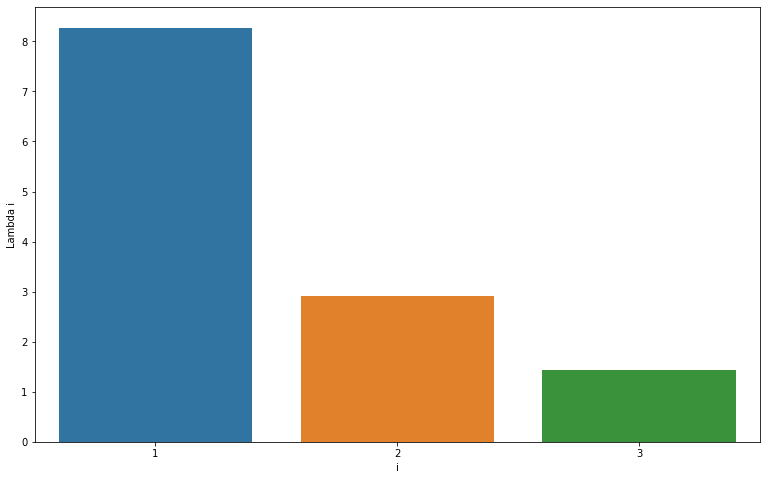

In [153]:

plt.figure(figsize=(13,8))
sns.barplot(x = list(range(1,4)), y = p.explained_variance_)
plt.xlabel('i')
plt.ylabel('Lambda i');


In [154]:
data_PCA = pd.DataFrame(p.transform(data), columns=(['col1','col2','col3']))


In [155]:
data_PCA.describe()

,col1,col2,col3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,8.512379e-17,-1.535842e-17,-4.796244e-16
std,2.876570e+00,1.709068e+00,1.196078e+00
min,-5.915030e+00,-4.398453e+00,-3.542584e+00
25%,-2.548037e+00,-1.343428e+00,-8.634541e-01
50%,-7.849324e-01,-1.333186e-01,-1.462285e-02
75%,2.418554e+00,1.243056e+00,8.259645e-01
max,7.441146e+00,6.248183e+00,5.037620e+00


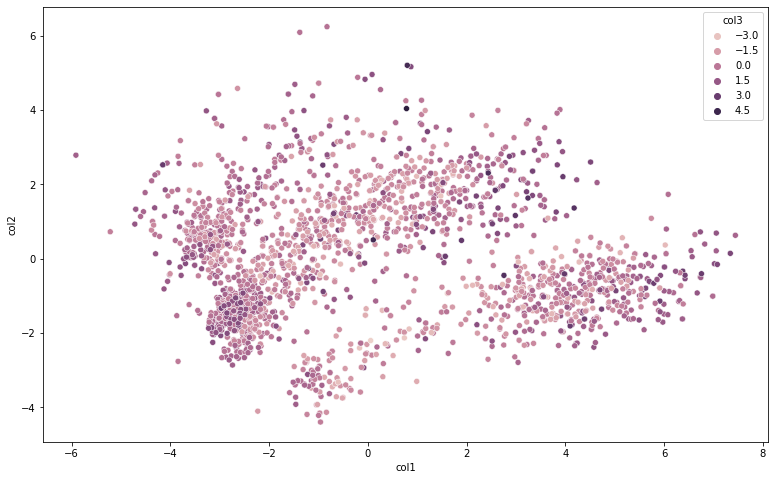

In [156]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

plt.figure(figsize=(13,8))
sns.scatterplot(x,y,z);
plt.show()


In [157]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [158]:
AC = AgglomerativeClustering(n_clusters=4)

yAC = AC.fit_predict(data_PCA)
data_PCA['Clusters'] = yAC


In [159]:

# Adding the Clusters to the original and the old datasets.

data['Clusters'] = yAC
data_old['Clusters'] = yAC


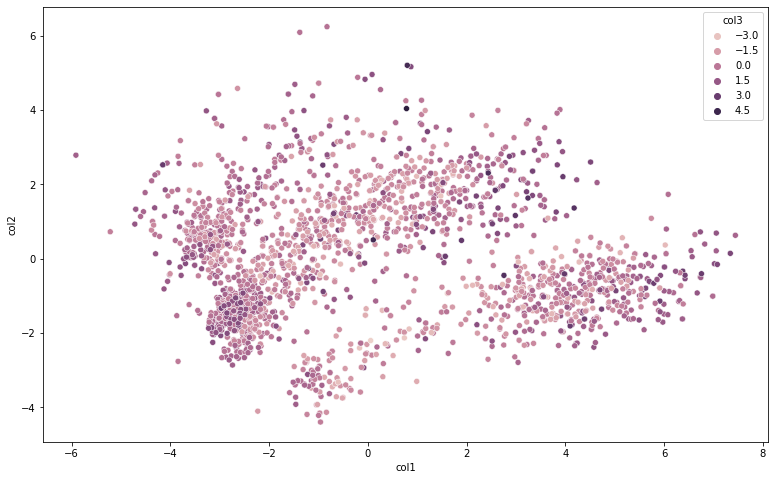

In [160]:

plt.figure(figsize=(13,8))
sns.scatterplot(x,y,z ,c= data_PCA['Clusters']);
plt.show()



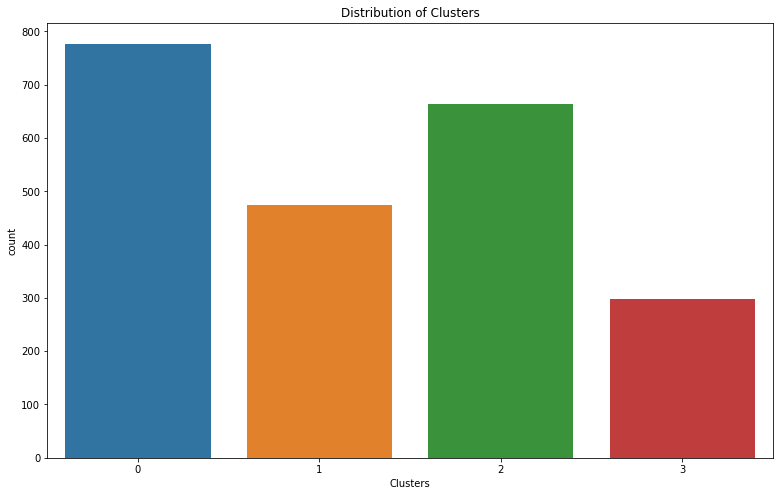

In [161]:

plt.figure(figsize=(13,8))
pl = sns.countplot(x=data['Clusters'])
pl.set_title('Distribution of Clusters')
plt.show()


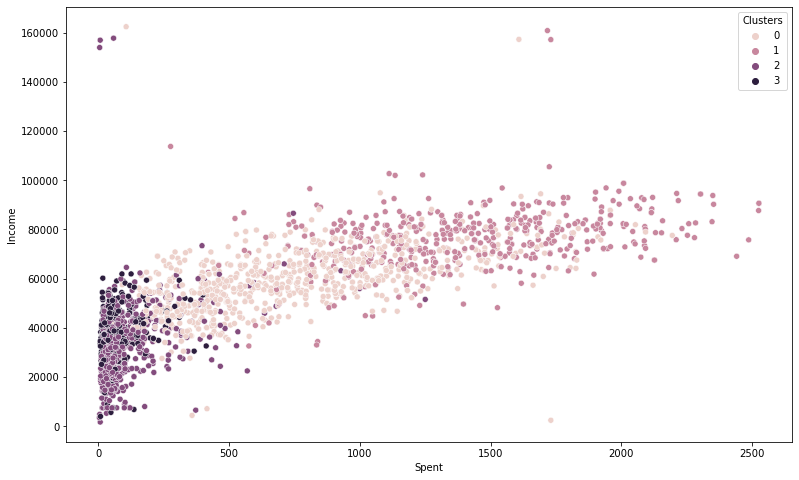

In [162]:

plt.figure(figsize=(13,8))
sns.scatterplot(data=data_old , x=data_old['Spent'], y = data_old['Income'], hue =data_old['Clusters'])
plt.show()


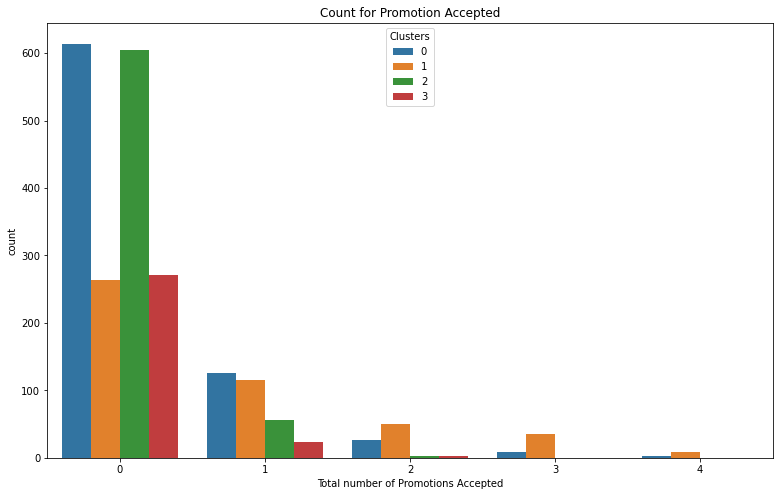

In [163]:

# Plotting Total campaign accepeted

data_old['Total_Promos'] = data_old['AcceptedCmp1'] + data_old['AcceptedCmp2'] + data_old['AcceptedCmp3'] + data_old['AcceptedCmp4'] + data_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
cp = sns.countplot(x=data_old['Total_Promos'], hue=data_old['Clusters'])
cp.set_title('Count for Promotion Accepted')
cp.set_xlabel('Total number of Promotions Accepted')
plt.show()


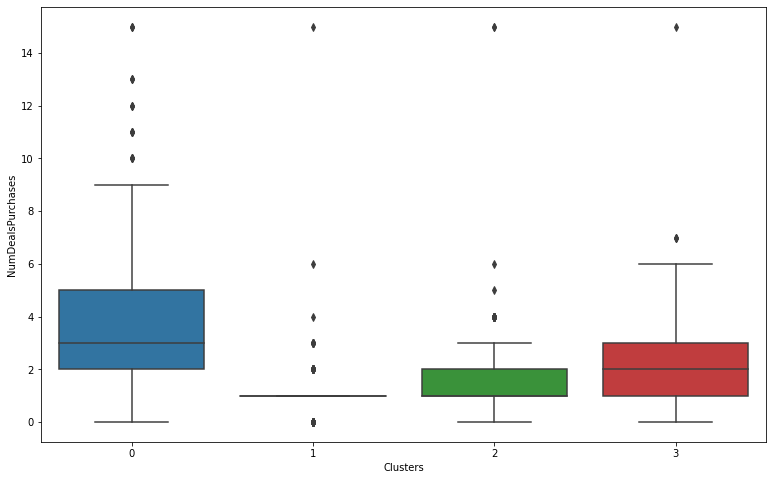

In [164]:

# Plotting the number of deals purchased

plt.figure(figsize=(13,8))
sns.boxplot( y = data_old['NumDealsPurchases'], x = data_old['Clusters'])
plt.show()


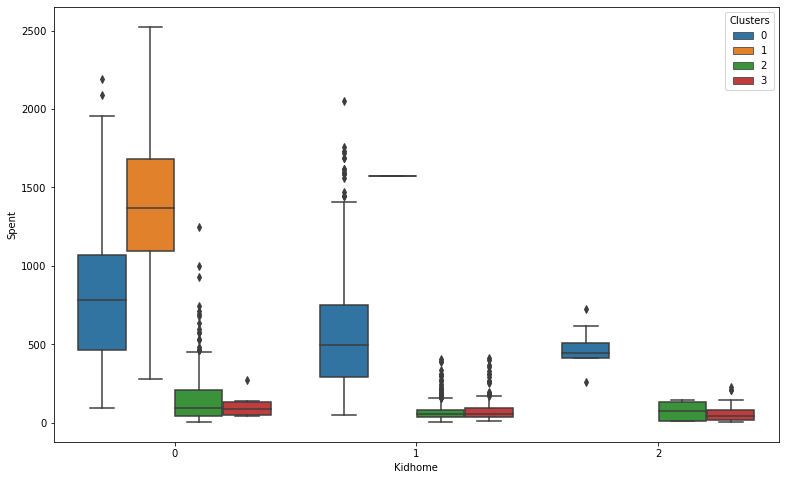

In [165]:

# Plotting the boxplot for kidhome w.r.t spent

plt.figure(figsize=(13,8))
sns.boxplot( y = data_old['Spent'], x = data_old['Kidhome'] , hue = data_old['Clusters'])
plt.show()


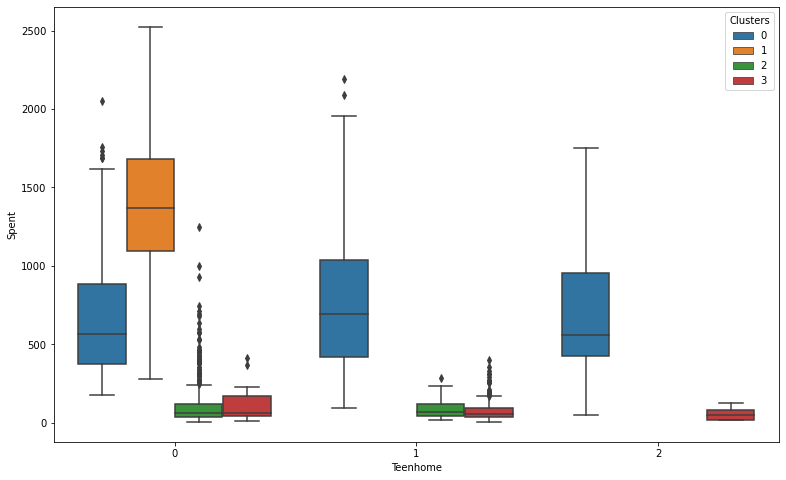

In [166]:

# Plotting the boxplot for Teenhome w.r.t spent

plt.figure(figsize=(13,8))
sns.boxplot(x = data_old['Teenhome'], y = data_old['Spent'], hue = data_old['Clusters'])
plt.show()


<Figure size 936x576 with 0 Axes>

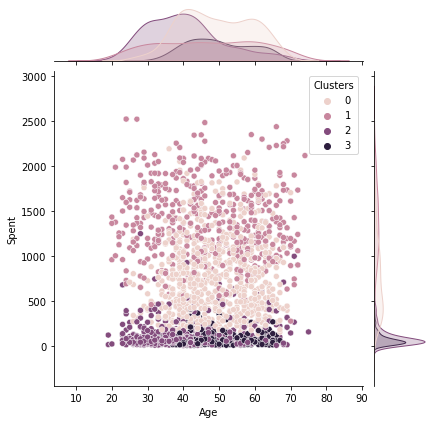

In [167]:

# Plotting the boxplot for Age w.r.t spent

plt.figure(figsize=(13,8))
sns.jointplot( y = data_old['Spent'], x = data_old['Age'] , hue = data_old['Clusters'])
plt.show()


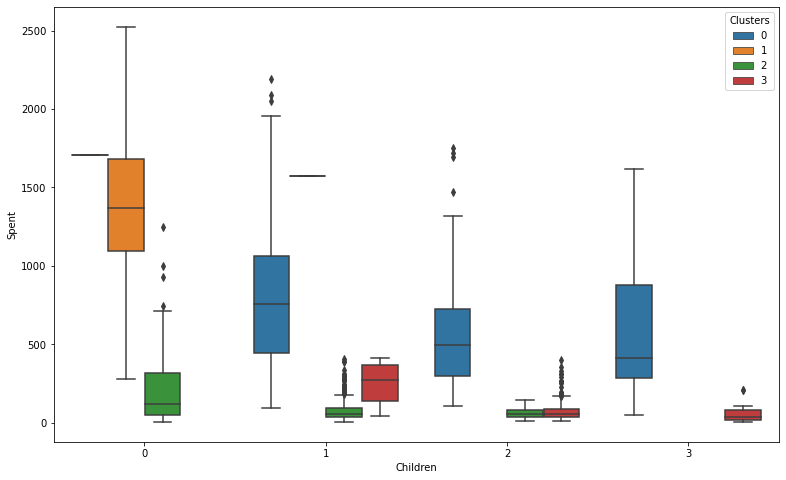

In [168]:

# Plotting the boxplot for Children w.r.t spent

plt.figure(figsize=(13,8))
sns.boxplot( y = data_old['Spent'], x = data_old['Children'] , hue = data_old['Clusters'])
plt.show()


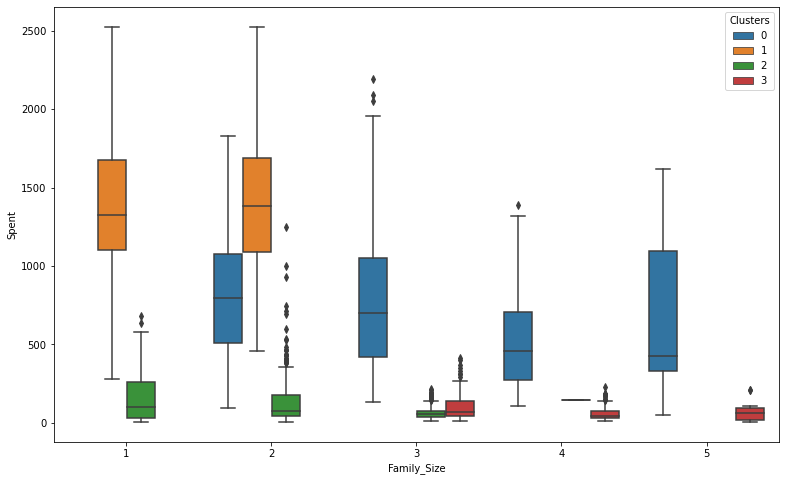

In [169]:

# Plotting the boxplot for Family_Size w.r.t Spent

plt.figure(figsize=(13,8))
sns.boxplot( y = data_old['Spent'], x = data_old['Family_Size'] , hue = data_old['Clusters'])
plt.show()


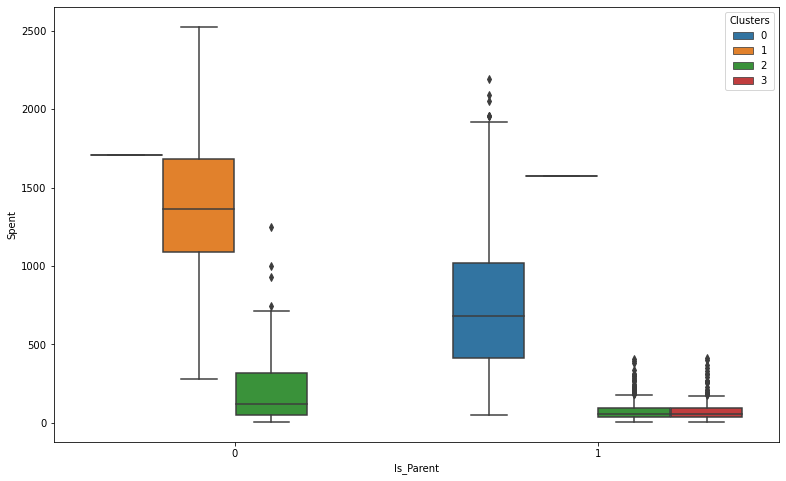

In [170]:

# Plotting the boxplot for Is_Parent w.r.t Spent

plt.figure(figsize=(13,8))
sns.boxplot( y = data_old['Spent'], x = data_old['Is_Parent'] , hue = data_old['Clusters'])
plt.show()


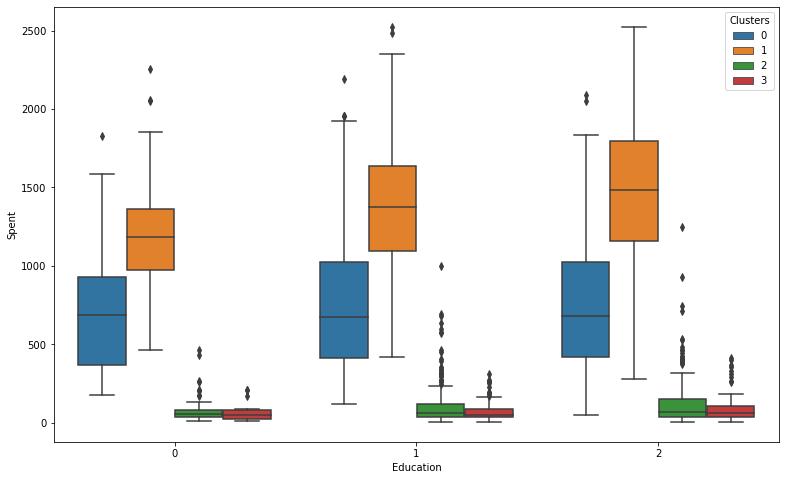

In [171]:

# Plotting the boxplot for Education w.r.t Spent

plt.figure(figsize=(13,8))
sns.boxplot( y = data_old['Spent'], x = data_old['Education'] , hue = data_old['Clusters'])
plt.show()


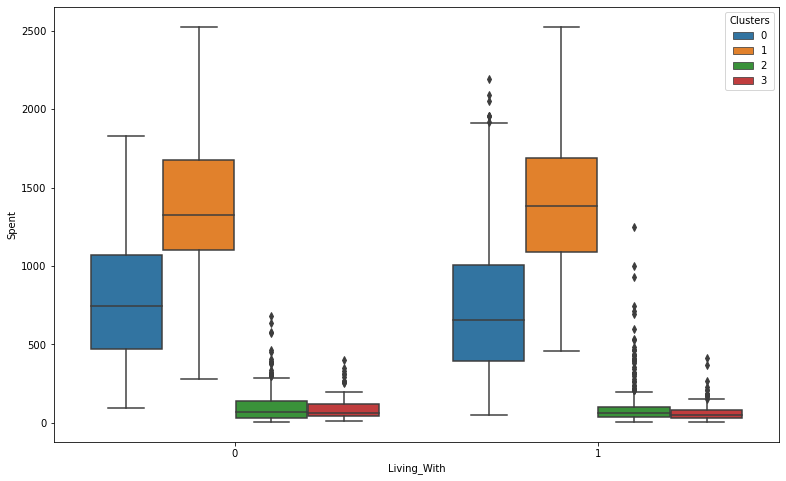

In [172]:

# Plotting the boxplot for Living_With w.r.t Spent

plt.figure(figsize=(13,8))
sns.boxplot( y = data_old['Spent'], x = data_old['Living_With'] , hue = data_old['Clusters'])
plt.show()


# CHURN PREDICTION

In [14]:
# Loading and reading the dataset

new_data = pd.read_csv('User+App+Behaviour.csv')
new_data.head()




,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [15]:
new_data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [16]:
# Checking for Duplicate rows

new_data.duplicated().sum()


0

In [17]:
# There are no duplicate values

# Check for missing values or any uniquesness


In [18]:
new_data.nunique()


CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                  220
dtype: int64

In [19]:
# Unique values for columns

for col in new_data.drop(['CustomerID','CashbackAmount'], axis=1).columns:
    print('----------  '+ col + '  ----------' )
    print(' ')
    print(new_data[col].unique())
    print(' ')
    print(' ')



----------  Churn  ----------
 
[1 0]
 
 
----------  Tenure  ----------
 
[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
 
 
----------  PreferredLoginDevice  ----------
 
['Mobile Phone' 'Phone' 'Computer']
 
 
----------  CityTier  ----------
 
[3 1 2]
 
 
----------  WarehouseToHome  ----------
 
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
 
 
----------  PreferredPaymentMode  ----------
 
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
 
 
----------  Gender  ----------
 
['Female' 'Male']
 
 
----------  HourSpendOnApp  ----------
 
[ 3.  2. nan  1.  0.  4.  5.]
 
 
----------  NumberOfDeviceRegistered  ----------
 
[3 4 5 2 1 6]
 
 
----------  PreferedOrderCat  ----------
 
['Laptop & Accessory' 'Mobile' 'Mobile Ph

In [20]:

# Correct the values of columns 

new_data['PreferredLoginDevice'].replace({'Mobile Phone':'Mobile','Phone':'Mobile'}, inplace=True)

new_data['WarehouseToHome'].replace({'126':'26','127':'27'}, inplace=True)

new_data['PreferredPaymentMode'].replace({'Credit Card':'CC','Cash on Delivery':'COD','Debit Card':'DC'}, inplace=True)

new_data['PreferedOrderCat'].replace({'Mobile Phone':'Mobile','Laptop & Accessory':'Laptop'}, inplace=True)



In [21]:

new_data[new_data.NumberOfAddress > 5].shape[0]


1453

In [22]:
 
# Missing Values

new_data.isnull().sum()



CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [23]:

# To find skewness ,we have to find the columns with missing values and then their percentage 


In [24]:
new_data.isnull().sum(axis=1).value_counts()


0    3774
1    1856
dtype: int64

In [25]:

missing_columns = [col for col in new_data.columns if new_data[col].isnull().any()]
missing_columns


['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

In [26]:

# Now for the percentage 

percentage = new_data[missing_columns].isnull().sum()*100/len(new_data)
missing_data = pd.DataFrame({'column':missing_columns, 'No.of Missing Values': new_data[missing_columns].isnull().sum().values,'Percentage': percentage.values})
missing_data



,column,No.of Missing Values,Percentage
0,Tenure,264,4.689165
1,WarehouseToHome,251,4.458259
2,HourSpendOnApp,255,4.529307
3,OrderAmountHikeFromlastYear,265,4.706927
4,CouponUsed,256,4.547069
5,OrderCount,258,4.582593
6,DaySinceLastOrder,307,5.452931


In [27]:

# calculation for skewness

new_data[missing_columns].skew(axis=0, skipna=True, numeric_only= True)


Tenure                         0.736513
WarehouseToHome                1.619154
HourSpendOnApp                -0.027213
OrderAmountHikeFromlastYear    0.790785
CouponUsed                     2.545653
OrderCount                     2.196414
DaySinceLastOrder              1.191000
dtype: float64

In [28]:

round(new_data.Tenure.mean()),round(new_data.WarehouseToHome.mean()),round(new_data.HourSpendOnApp.mean()),round(new_data.OrderAmountHikeFromlastYear.mean())


(10, 16, 3, 16)

In [29]:

new_data.CouponUsed.median(), new_data.OrderCount.median(), new_data.DaySinceLastOrder.median()


(1.0, 2.0, 3.0)

In [30]:

# Now we will fill the missing or empty new_data with 'i'th mean and median

new_data.fillna({'Tenure':round(new_data.Tenure.mean()),'WarehouseToHome':round(new_data.WarehouseToHome.mean()), 'HourSpendOnApp':round(new_data.HourSpendOnApp.mean()), 'OrderAmountHikeFromlastYear':round(new_data.OrderAmountHikeFromlastYear.mean()),'CouponUsed':new_data.CouponUsed.median(),'OrderCount':new_data.OrderCount.median(),'DaySinceLastOrder':new_data.DaySinceLastOrder.median()}, inplace=True)
                

In [31]:

new_data.head()


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile,3,6.0,DC,Female,3.0,3,Laptop,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,10.0,Mobile,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,10.0,Mobile,1,30.0,DC,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Mobile,3,15.0,DC,Male,2.0,4,Laptop,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Mobile,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [32]:

new_data.isnull().sum()


CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

###### EDA


In [33]:
# defining a function for further usage

def unique_list():
    unique=[]
    for col in new_data.columns:
        if col in ['CustomerID', 'CashbackAmount']:
            unique.append('Number of values too long for DF')
        else:
            unique.append(new_data[col].unique())
        return unique



In [34]:

new_data['Churn'].value_counts()


0    4682
1     948
Name: Churn, dtype: int64

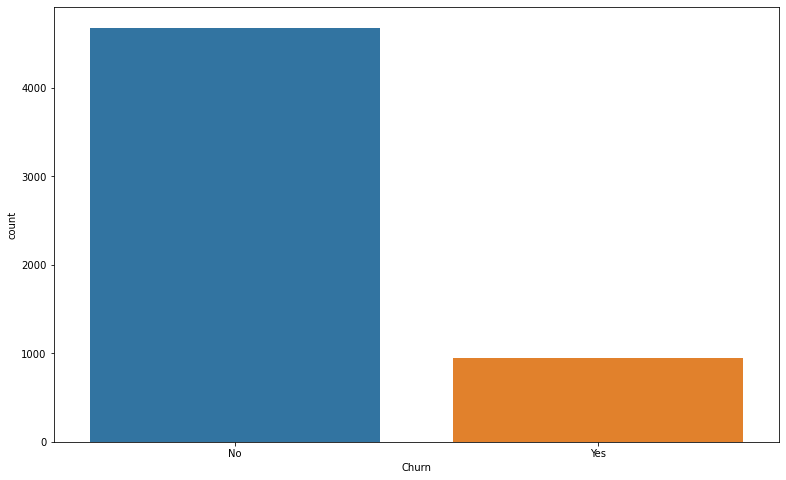

In [35]:

x_labels=['No','Yes']

fig, ax= plt.subplots(figsize=(13,8))
ax=sns.countplot(x='Churn', data=new_data)
ax.set_xticklabels(x_labels)
plt.show()


###### Handling Numeric Features by defining new functions


In [36]:

def plot_numv(var_name, var_label):
    plt.figure(figsize=(30,10))
    plt.suptitle('Distribution of {}'.format(var_name))
    
    plt.subplot(1,2,1)
    sns.histplot(data=new_data , x = var_name)
    plt.xlabel(var_name)
    plt.ylabel('Count')
    
    plt.subplot(1,2,2)
    sns.boxplot(data=new_data , x = var_name)
    plt.xlabel(var_name)
    plt.ylabel('Count')
    
    plt.show()
    


def plot_numv_cr(var_name, var_label):
    plt.figure(figsize=(30,10))
    plt.suptitle('Distribution of {}'.format(var_name))
    
    plt.subplot(1,2,1)
    sns.histplot(data=new_data , x = var_name, hue='Churn')
    plt.xlabel(var_name)
    plt.ylabel('Count')
    
    plt.subplot(1,2,2)
    sns.boxplot(data=new_data , x = 'Churn', y = var_name)
    plt.xlabel(var_name)
    plt.ylabel('Churn Value')
    
    plt.show()
    

In [37]:
percentiles=[0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

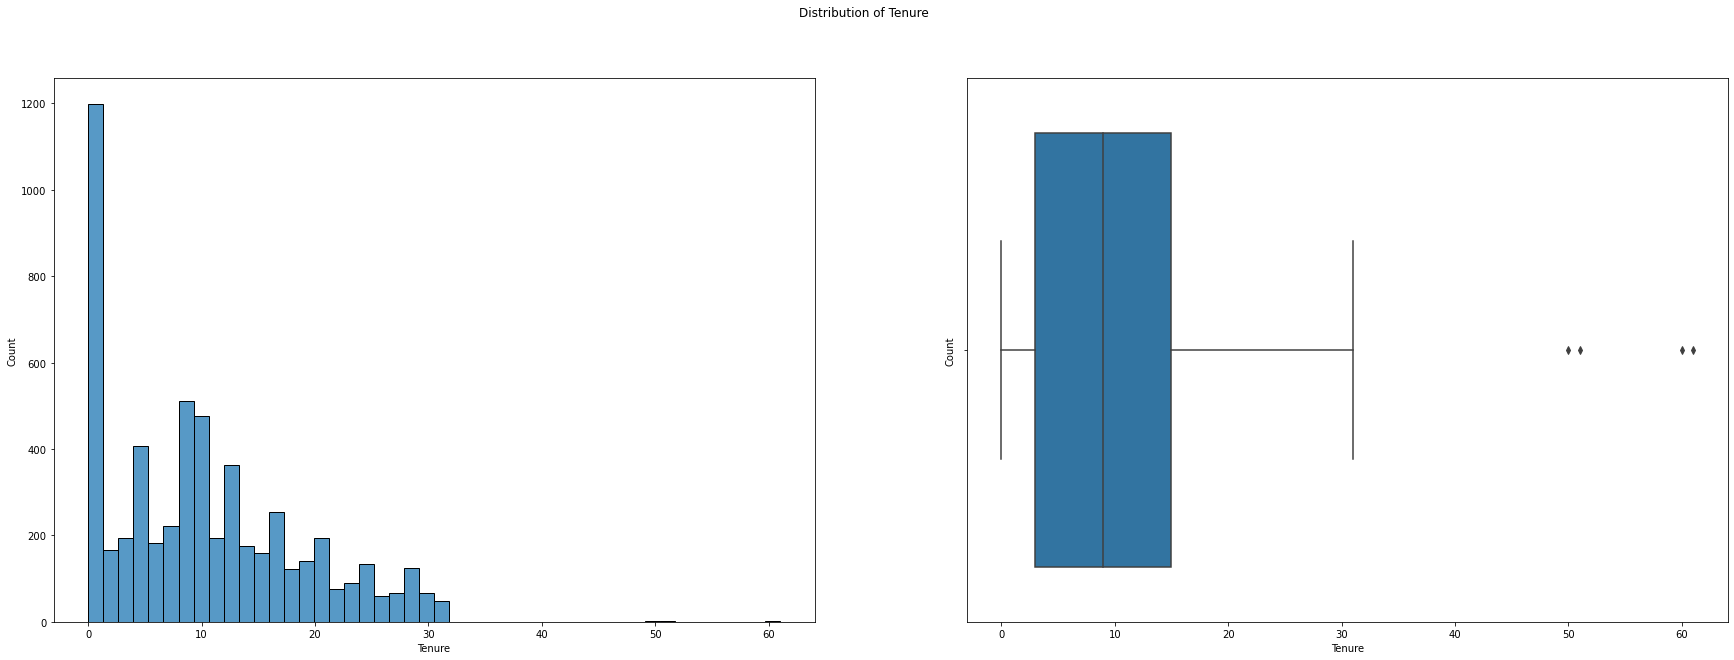

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Tenure,5630.0,10.180995,8.354261,0.0,1.0,1.0,3.0,4.0,7.0,9.0,11.0,14.0,15.0,17.0,23.0,30.0,61.0


In [38]:

plot_numv('Tenure', 'Churn')
pd.DataFrame(new_data['Tenure'].describe(percentiles=percentiles)).T


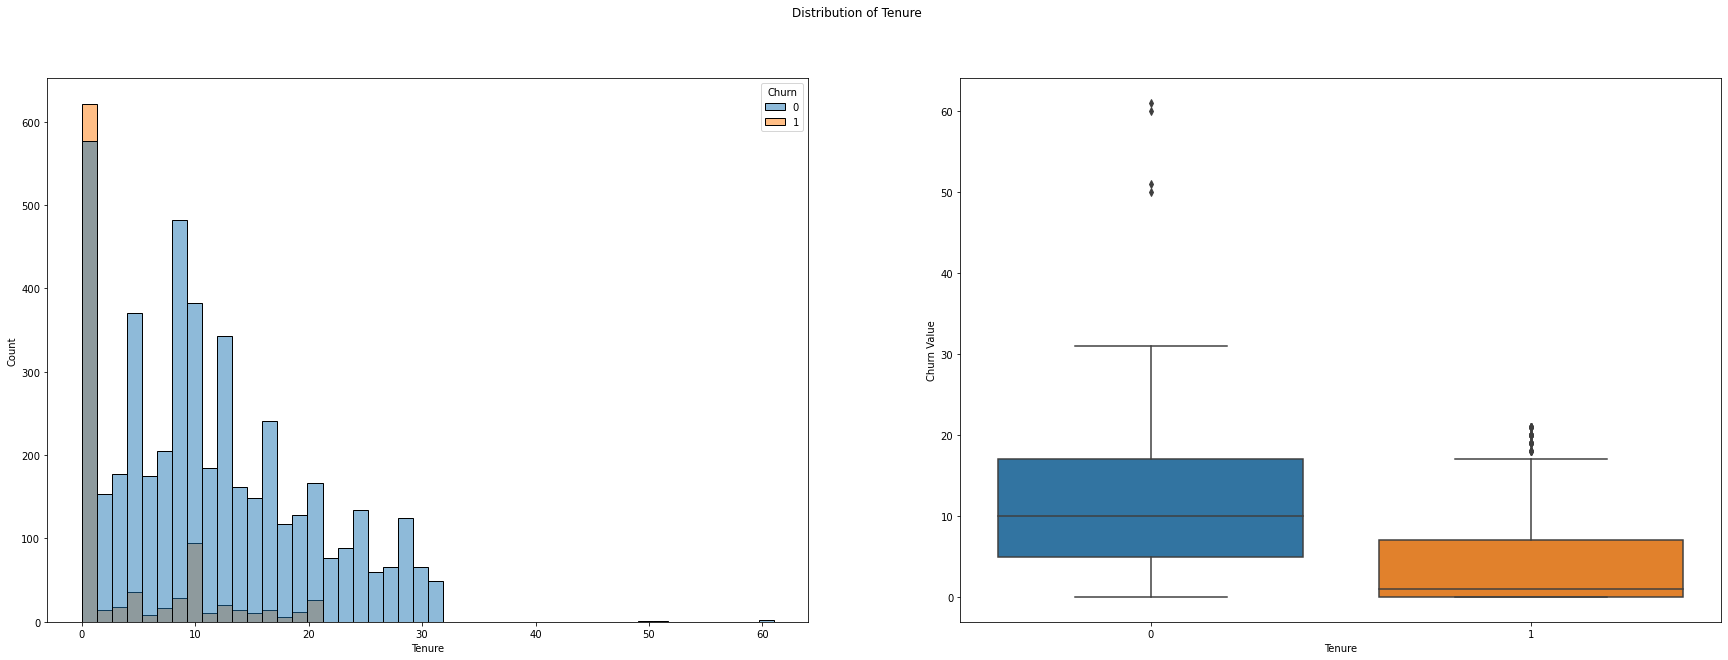

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,11.443614,8.258140,0.0,1.0,4.0,5.0,6.0,8.0,10.0,12.0,15.0,17.0,19.0,24.0,31.00,61.0
1,948.0,3.945148,5.563415,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,7.0,10.0,12.3,20.53,21.0


In [39]:

plot_numv_cr('Tenure','Churn')
new_data.groupby('Churn')['Tenure'].describe(percentiles=percentiles)


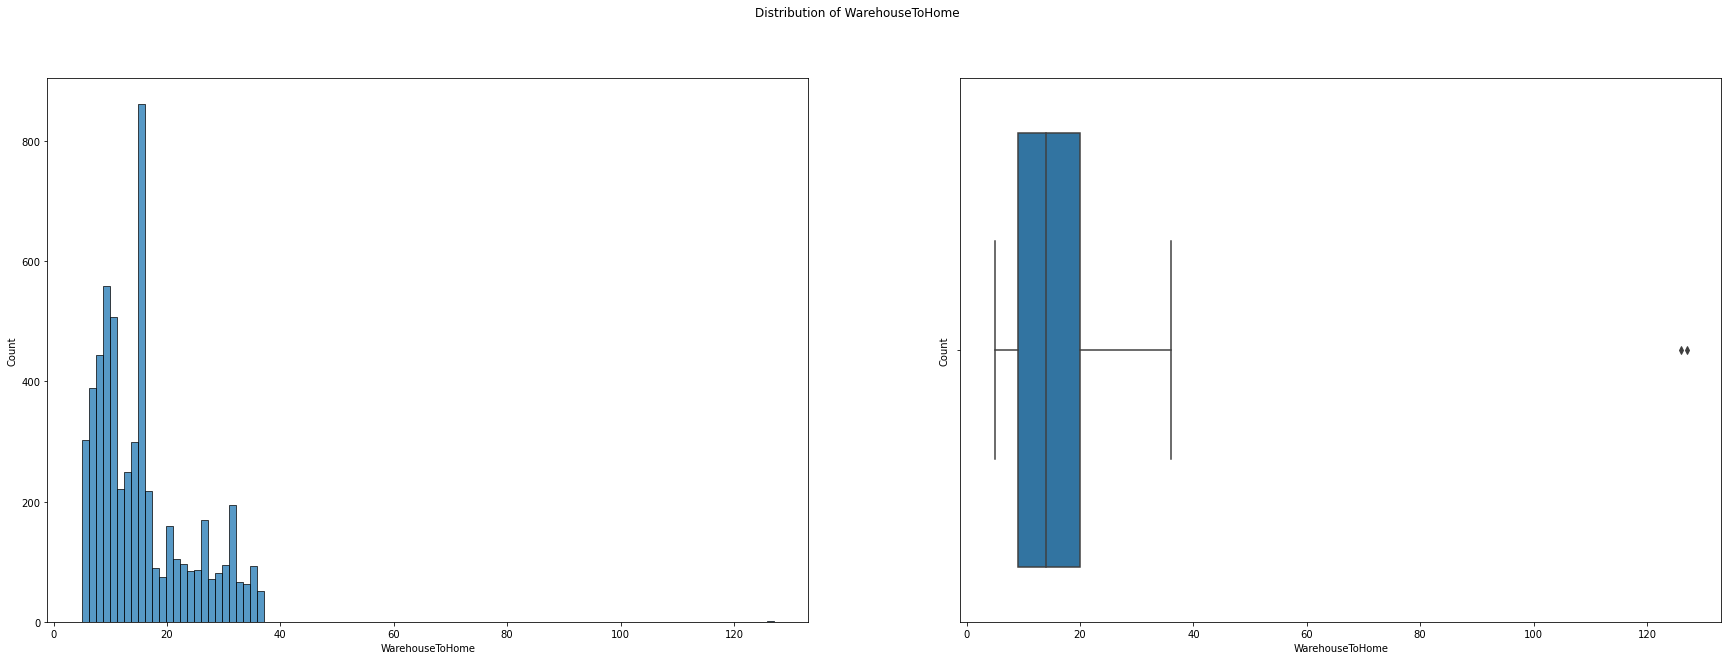

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
WarehouseToHome,5630.0,15.65595,8.339426,5.0,7.0,8.0,9.0,9.0,12.0,14.0,16.0,17.0,20.0,23.0,30.0,35.0,127.0


In [40]:

plot_numv('WarehouseToHome','Churn')
pd.DataFrame(new_data['WarehouseToHome'].describe(percentiles=percentiles)).T


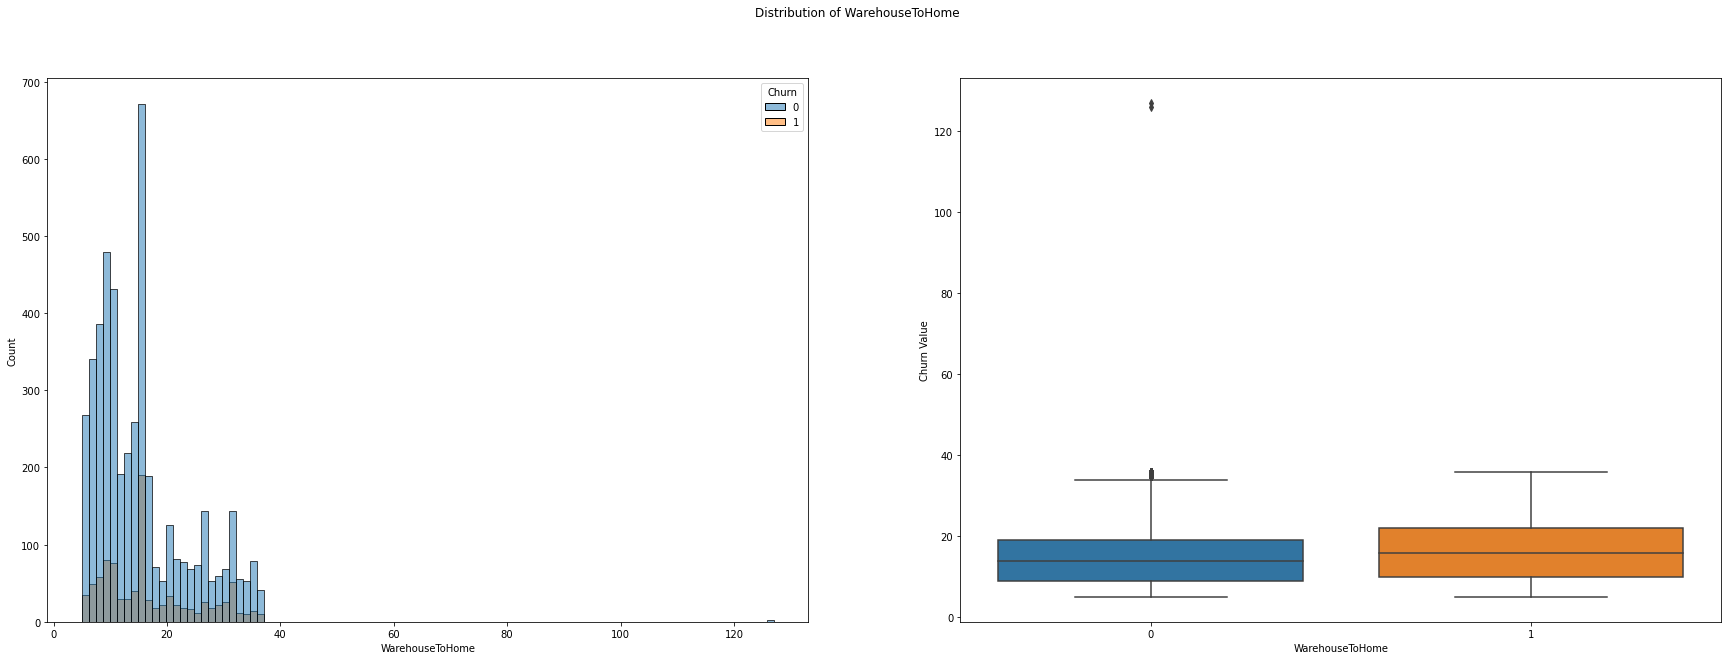

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,15.376976,8.331439,5.0,7.0,8.0,9.0,9.0,11.0,14.0,15.6,17.0,19.0,22.0,29.0,35.00,127.0
1,948.0,17.033755,8.245758,5.0,8.0,9.0,10.0,11.0,14.0,16.0,16.0,20.0,22.0,25.6,31.0,35.53,36.0


In [41]:

plot_numv_cr('WarehouseToHome','Churn')
new_data.groupby('Churn')['WarehouseToHome'].describe(percentiles=percentiles)


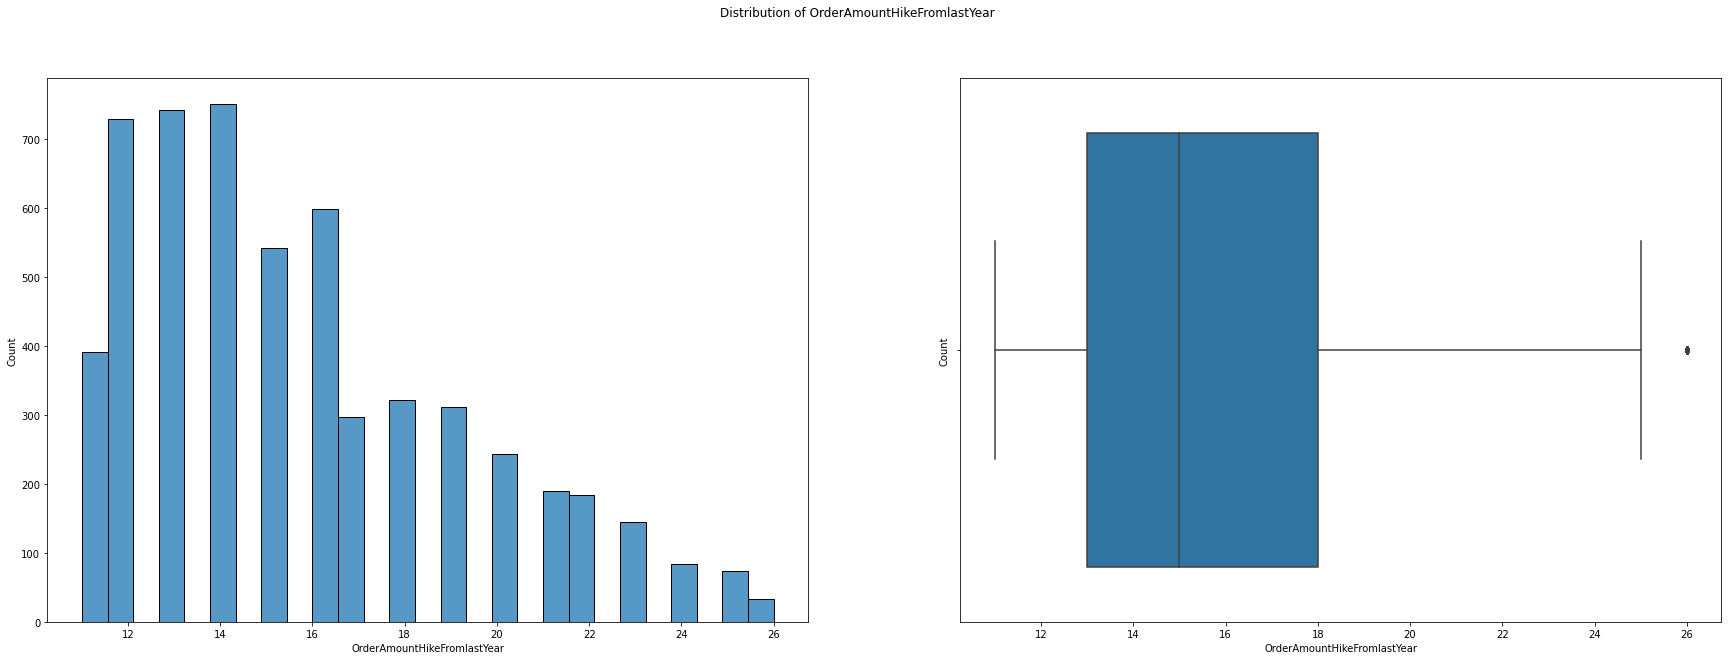

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
OrderAmountHikeFromlastYear,5630.0,15.72167,3.588459,11.0,12.0,13.0,13.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,21.0,25.0,26.0


In [42]:

plot_numv('OrderAmountHikeFromlastYear','Churn')
pd.DataFrame(new_data['OrderAmountHikeFromlastYear'].describe(percentiles=percentiles)).T


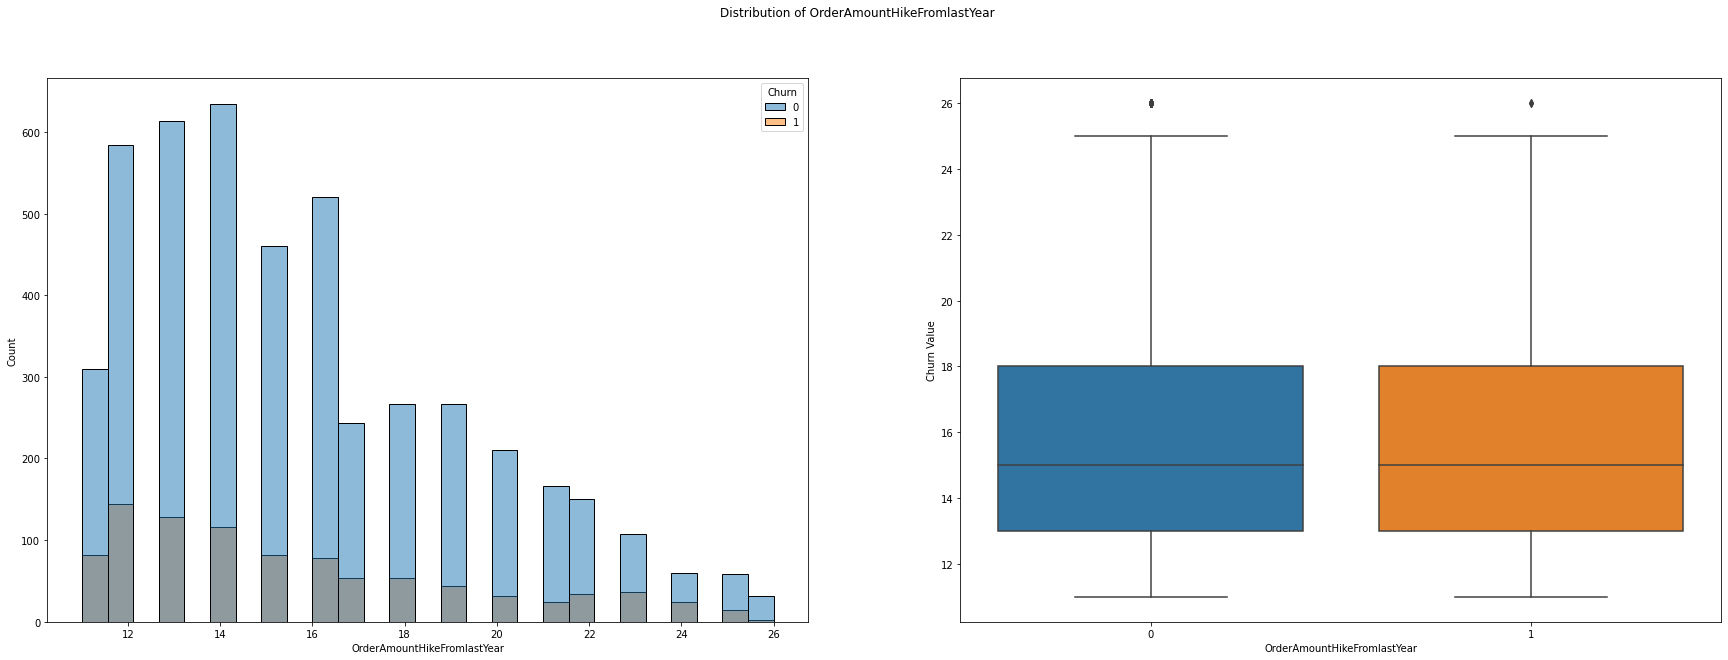

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,15.739641,3.547692,11.0,12.0,13.0,13.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,21.0,25.0,26.0
1,948.0,15.632911,3.784068,11.0,12.0,12.0,13.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,22.0,25.0,26.0


In [43]:


plot_numv_cr('OrderAmountHikeFromlastYear','Churn')
new_data.groupby('Churn')['OrderAmountHikeFromlastYear'].describe(percentiles=percentiles)


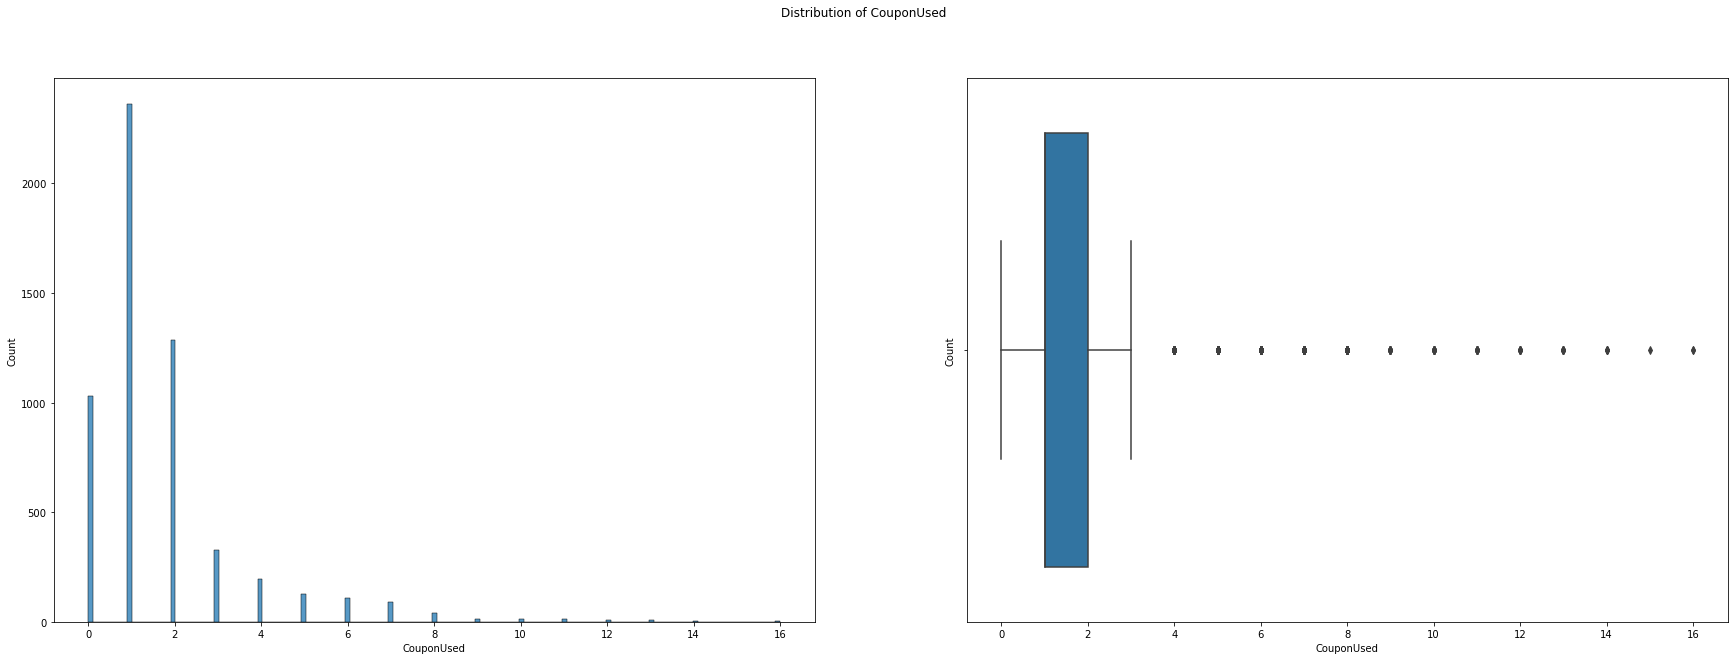

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
CouponUsed,5630.0,1.716874,1.85764,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,9.0,16.0


In [44]:

plot_numv('CouponUsed','Churn')
pd.DataFrame(new_data['CouponUsed'].describe(percentiles=percentiles)).T


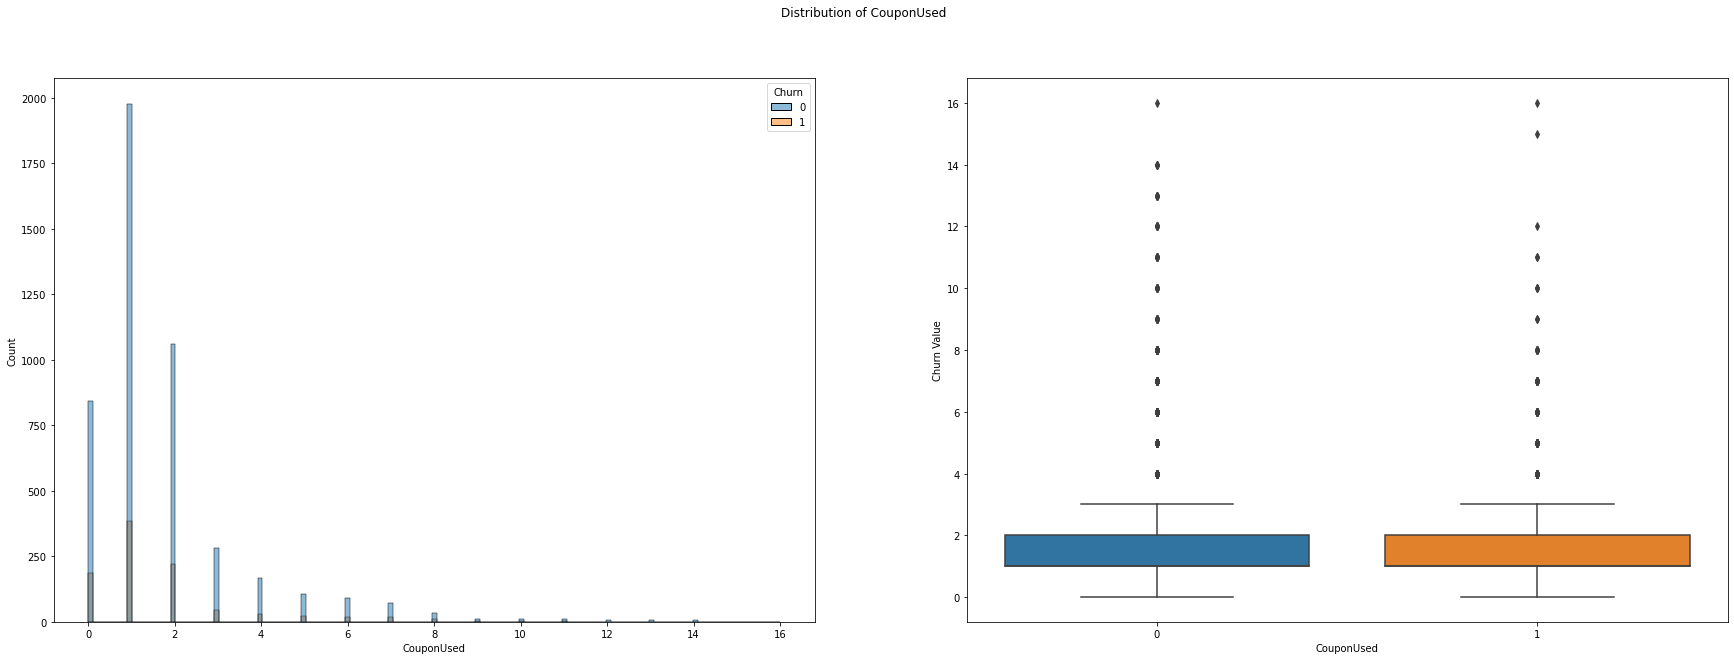

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,1.718069,1.850065,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,9.00,16.0
1,948.0,1.710970,1.895586,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,8.53,16.0


In [45]:

plot_numv_cr('CouponUsed','Churn')
new_data.groupby('Churn')['CouponUsed'].describe(percentiles=percentiles)


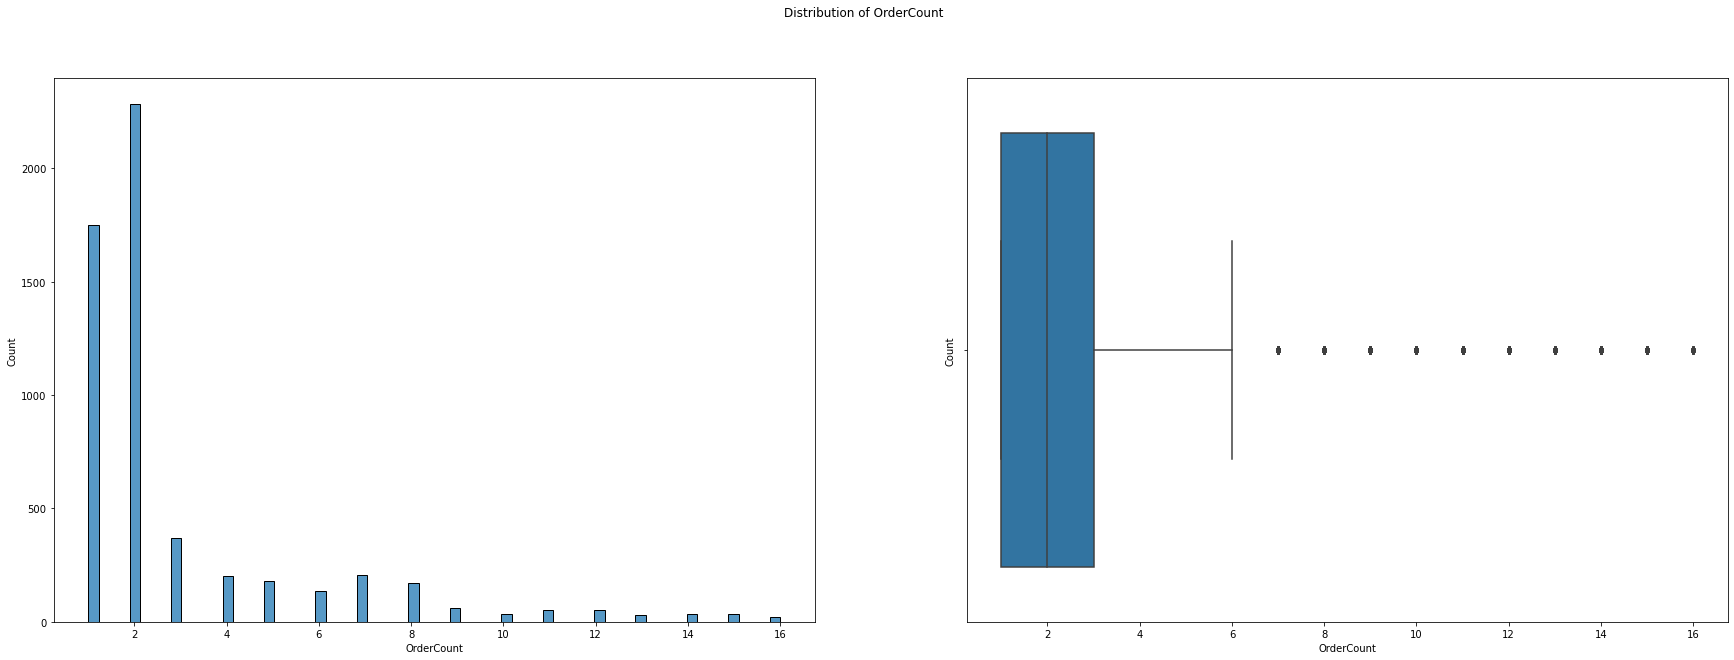

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
OrderCount,5630.0,2.961812,2.879248,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,7.0,14.0,16.0


In [46]:

plot_numv('OrderCount','Churn')
pd.DataFrame(new_data['OrderCount'].describe(percentiles=percentiles)).T


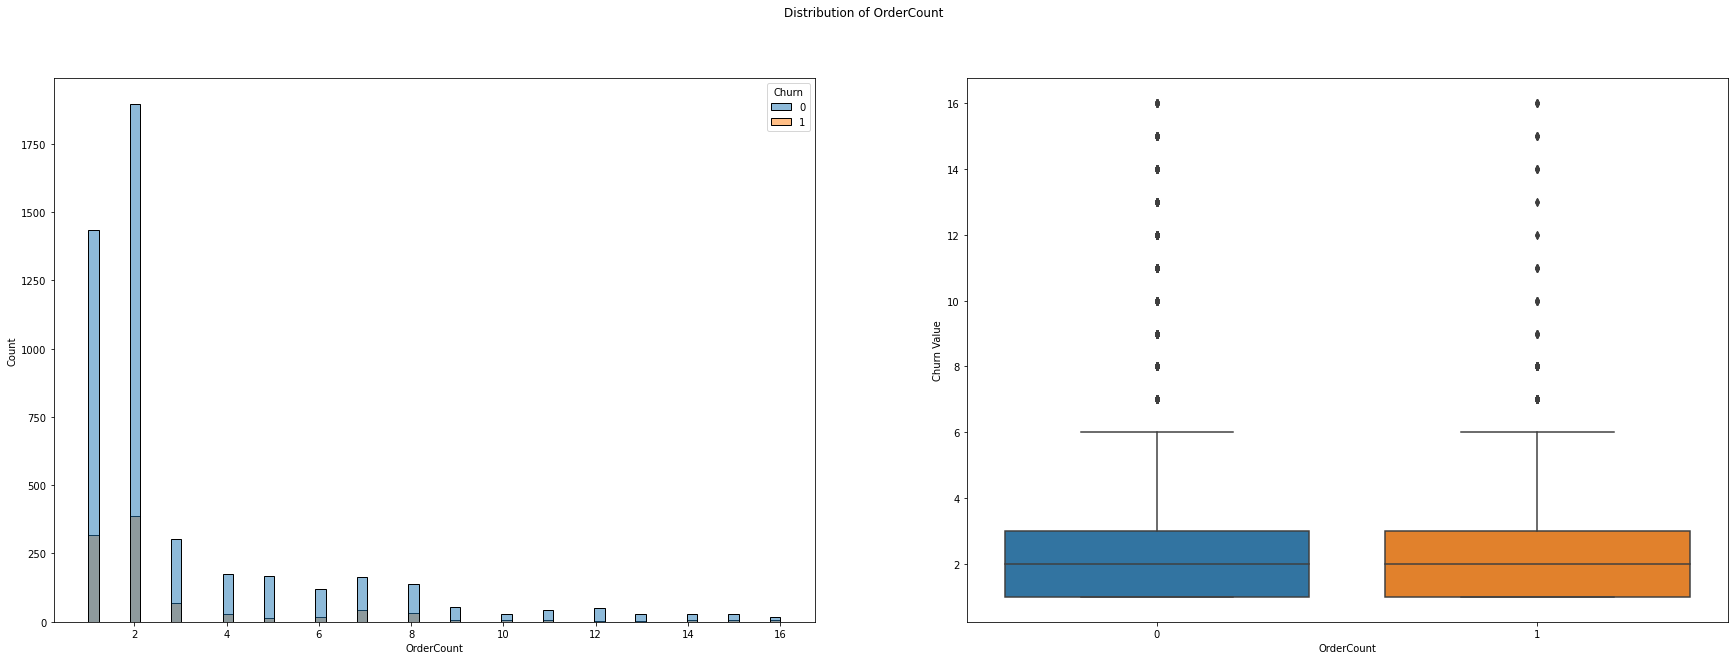

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,2.992952,2.897183,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,7.0,14.0,16.0
1,948.0,2.808017,2.785363,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,7.0,15.0,16.0


In [47]:


plot_numv_cr('OrderCount','Churn')
new_data.groupby('Churn')['OrderCount'].describe(percentiles=percentiles)


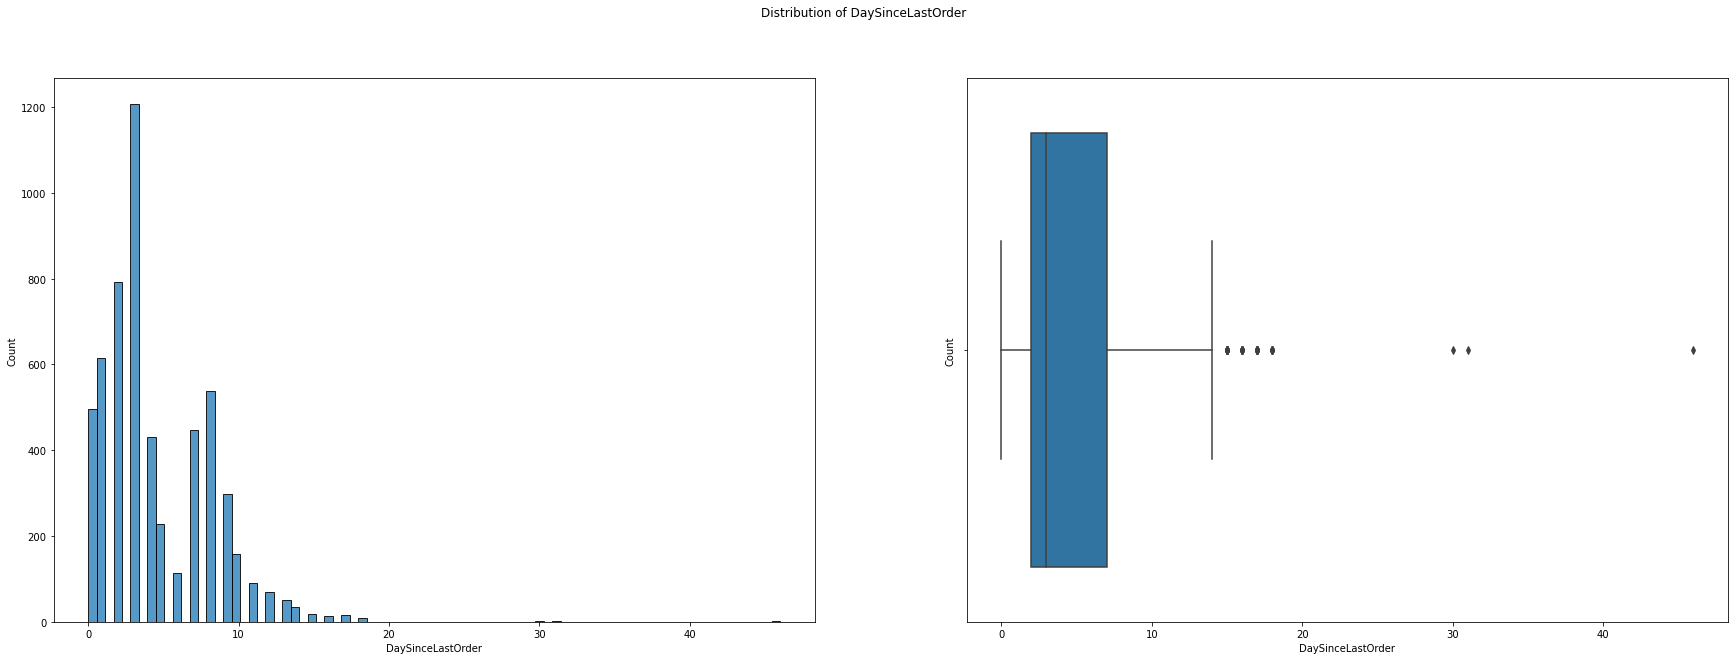

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
DaySinceLastOrder,5630.0,4.459325,3.570626,0.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,7.0,7.0,8.0,9.0,15.0,46.0


In [48]:


plot_numv('DaySinceLastOrder','Churn')
pd.DataFrame(new_data['DaySinceLastOrder'].describe(percentiles=percentiles)).T


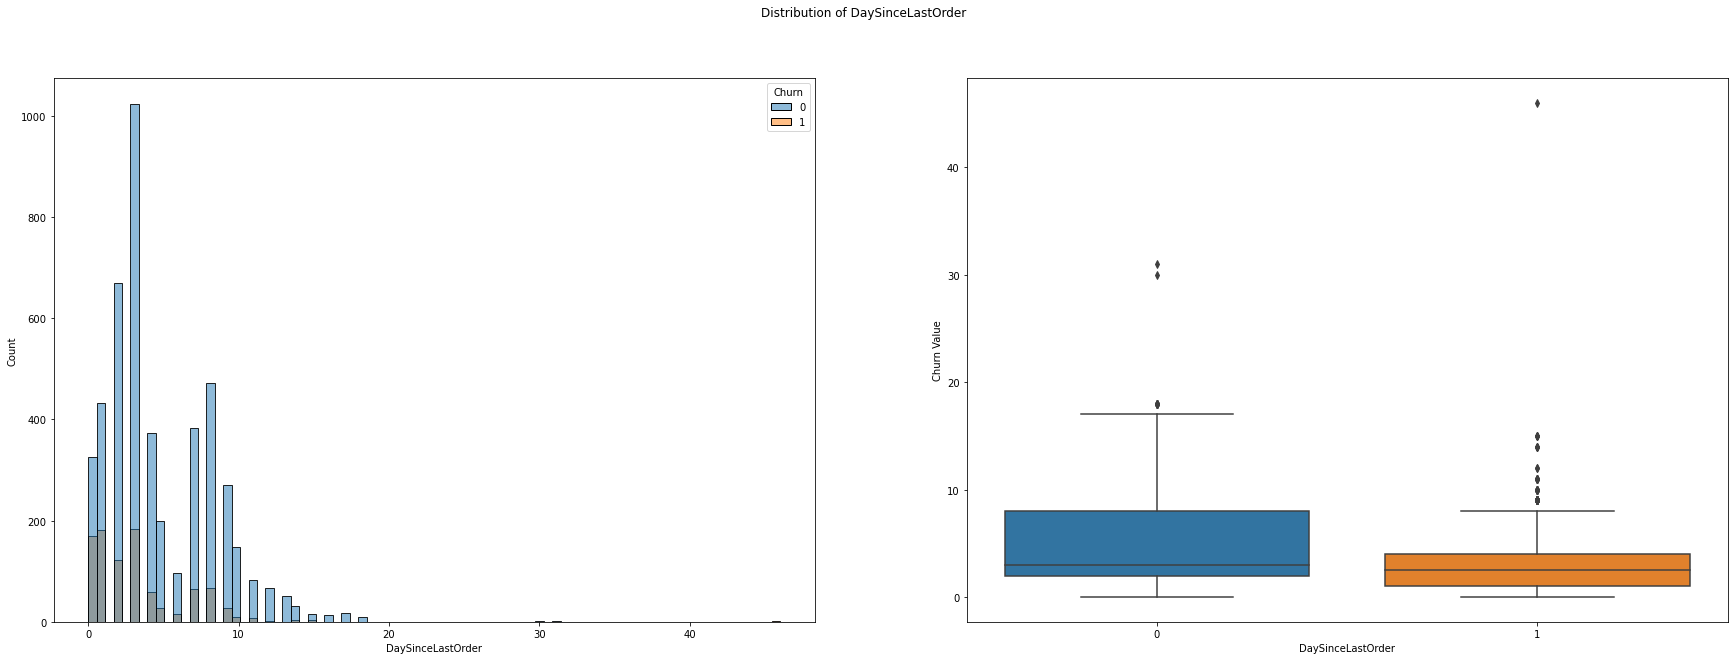

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,4.709739,3.568374,0.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,7.0,8.0,8.0,9.0,15.0,31.0
1,948.0,3.222574,3.316790,0.0,0.0,1.0,1.0,1.0,2.0,2.5,3.0,4.0,4.0,6.0,8.0,12.0,46.0


In [49]:


plot_numv_cr('DaySinceLastOrder','Churn')
new_data.groupby('Churn')['DaySinceLastOrder'].describe(percentiles=percentiles)



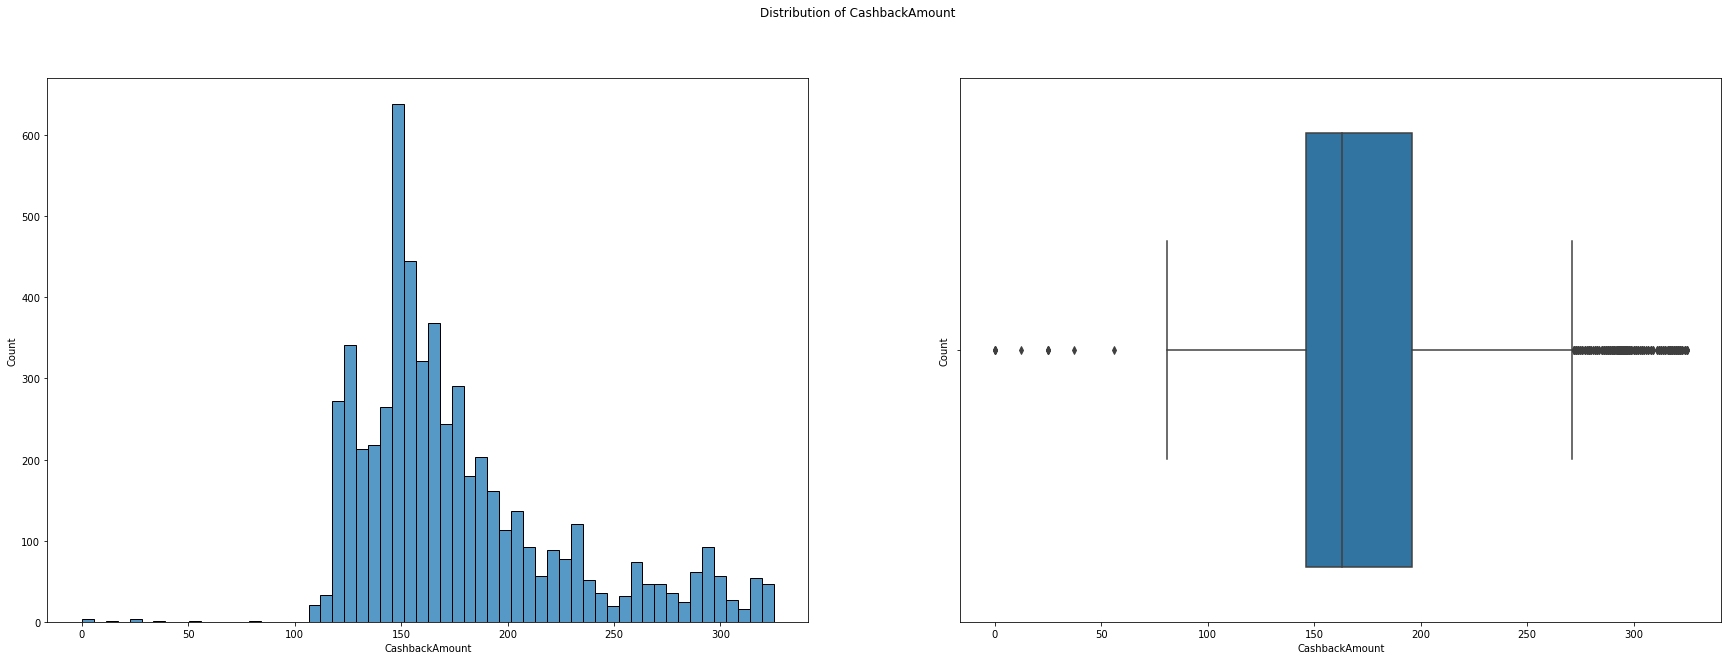

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
CashbackAmount,5630.0,177.221492,49.193869,0.0,127.0,141.0,146.0,148.0,154.0,163.0,173.0,187.0,196.0,209.0,260.0,318.71,325.0


In [50]:

plot_numv('CashbackAmount','Churn')
pd.DataFrame(new_data['CashbackAmount'].describe(percentiles=percentiles)).T


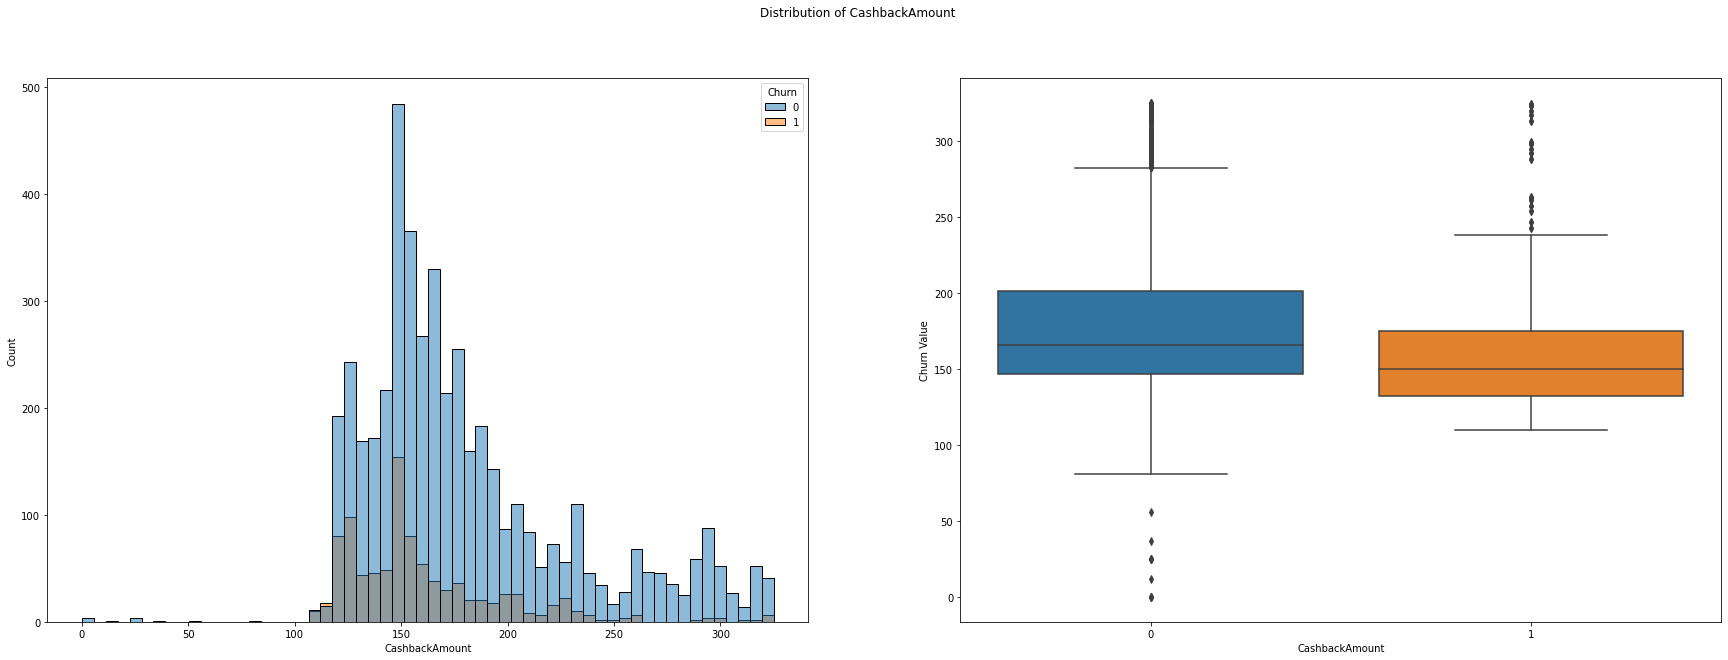

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,180.633704,50.422799,0.0,128.0,144.0,147.0,150.0,156.0,166.0,176.0,190.0,201.0,216.0,266.0,319.00,325.0
1,948.0,160.369198,38.413534,110.0,123.0,127.0,132.0,139.0,147.0,150.0,155.0,167.0,175.0,185.6,212.0,306.42,324.0


In [51]:

plot_numv_cr('CashbackAmount','Churn')
new_data.groupby('Churn')['CashbackAmount'].describe(percentiles=percentiles)


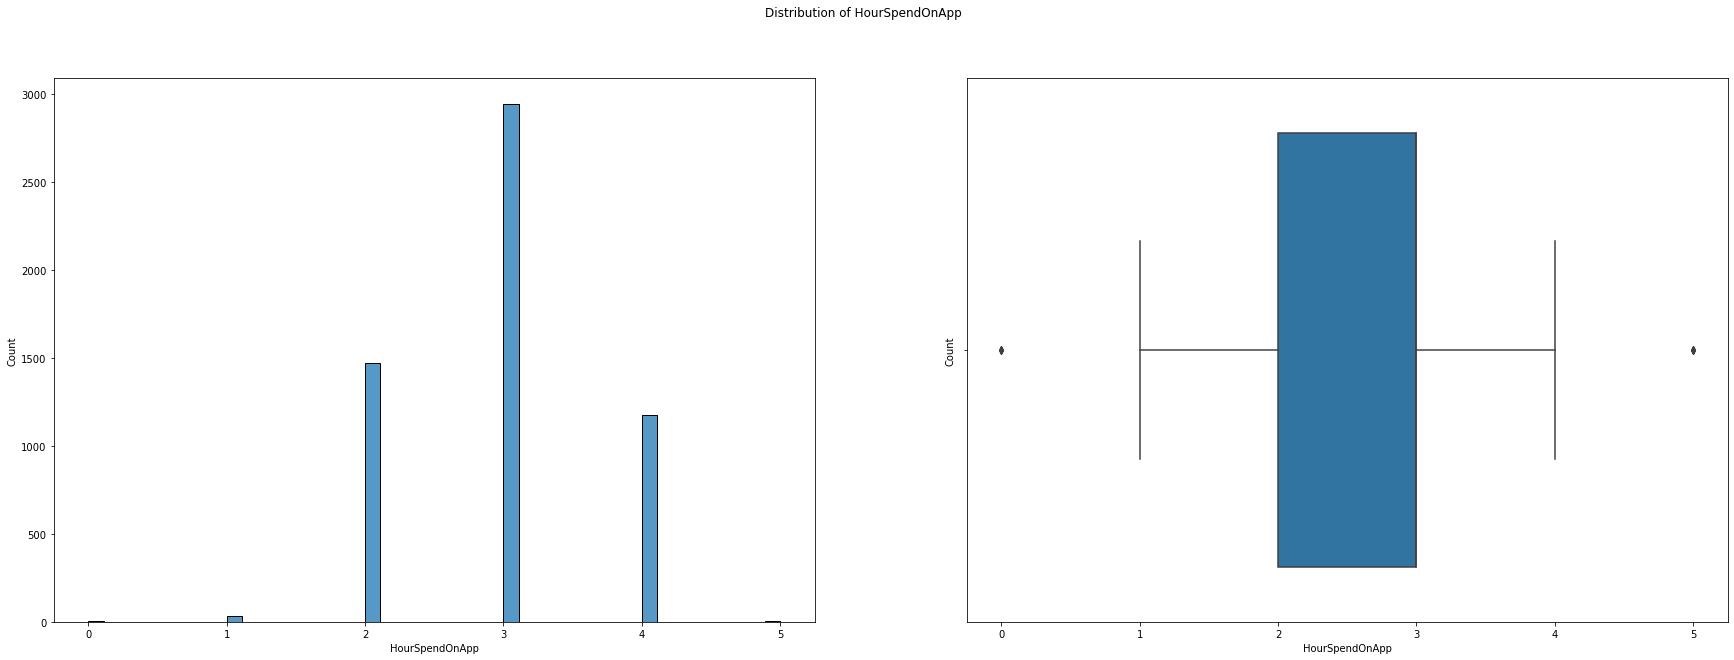

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0


In [52]:



plot_numv('HourSpendOnApp','Churn')
pd.DataFrame(new_data['HourSpendOnApp'].describe(percentiles=percentiles)).T


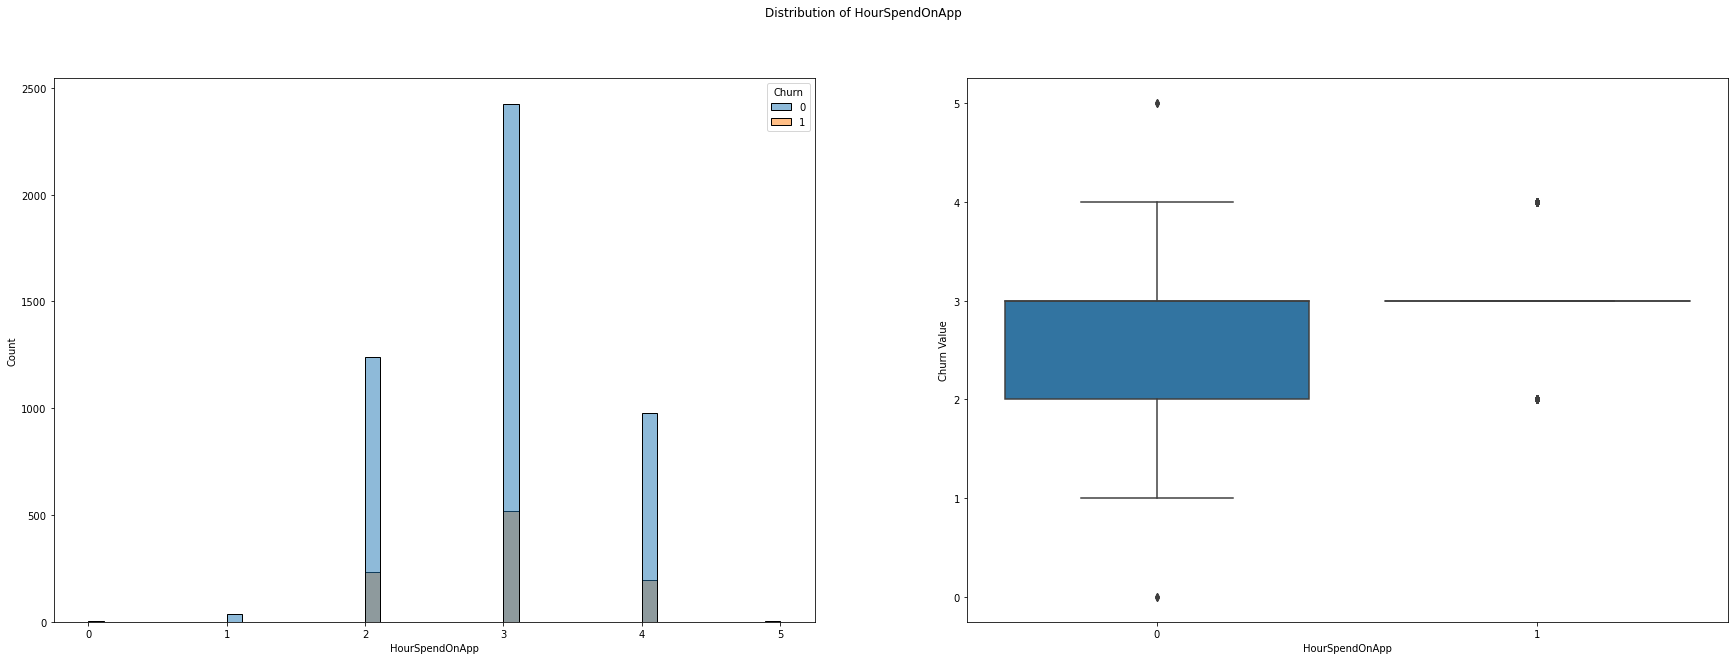

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,2.928663,0.711875,0.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0
1,948.0,2.964135,0.672888,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0


In [53]:

plot_numv_cr('HourSpendOnApp','Churn')
new_data.groupby('Churn')['HourSpendOnApp'].describe(percentiles=percentiles)


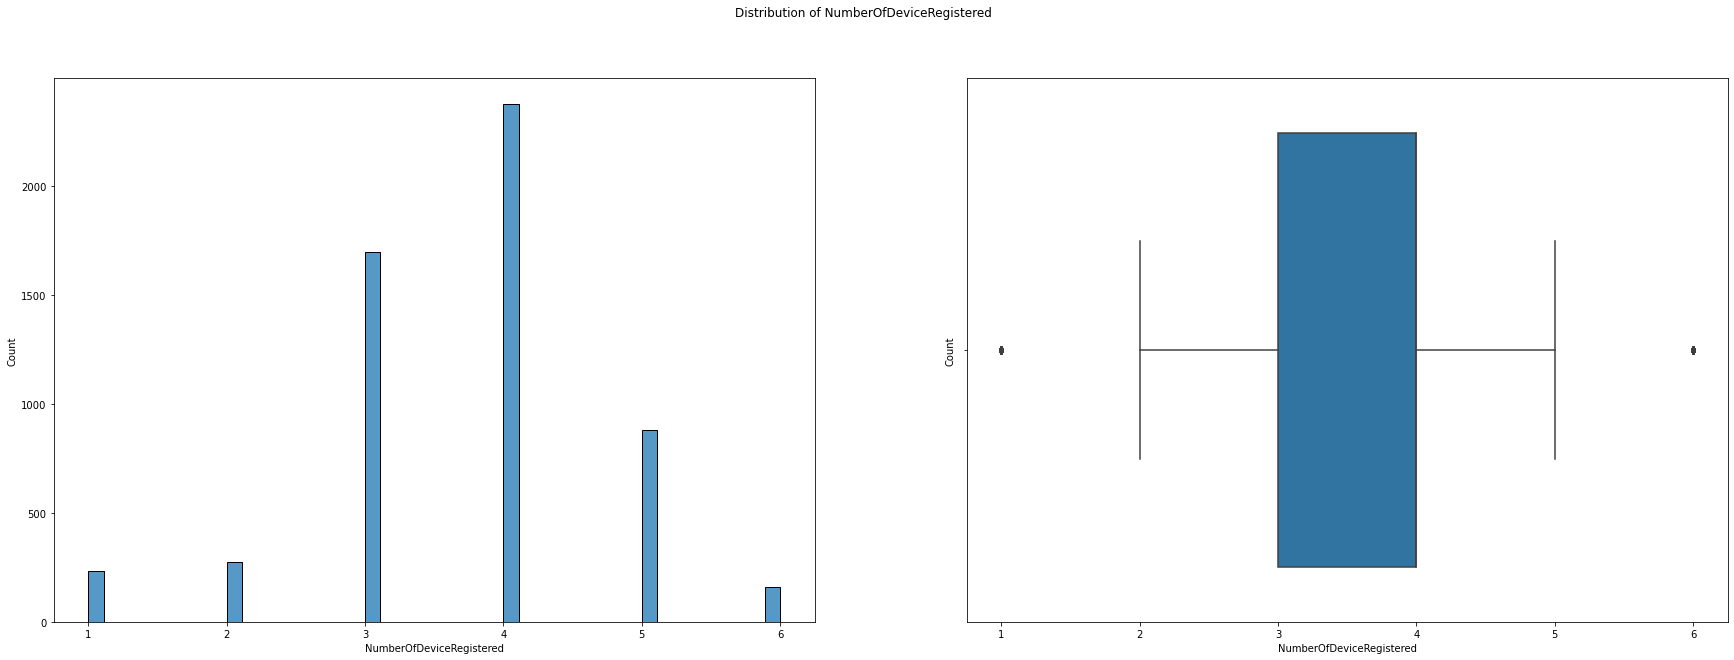

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,6.0,6.0


In [54]:


plot_numv('NumberOfDeviceRegistered','Churn')
pd.DataFrame(new_data['NumberOfDeviceRegistered'].describe(percentiles=percentiles)).T




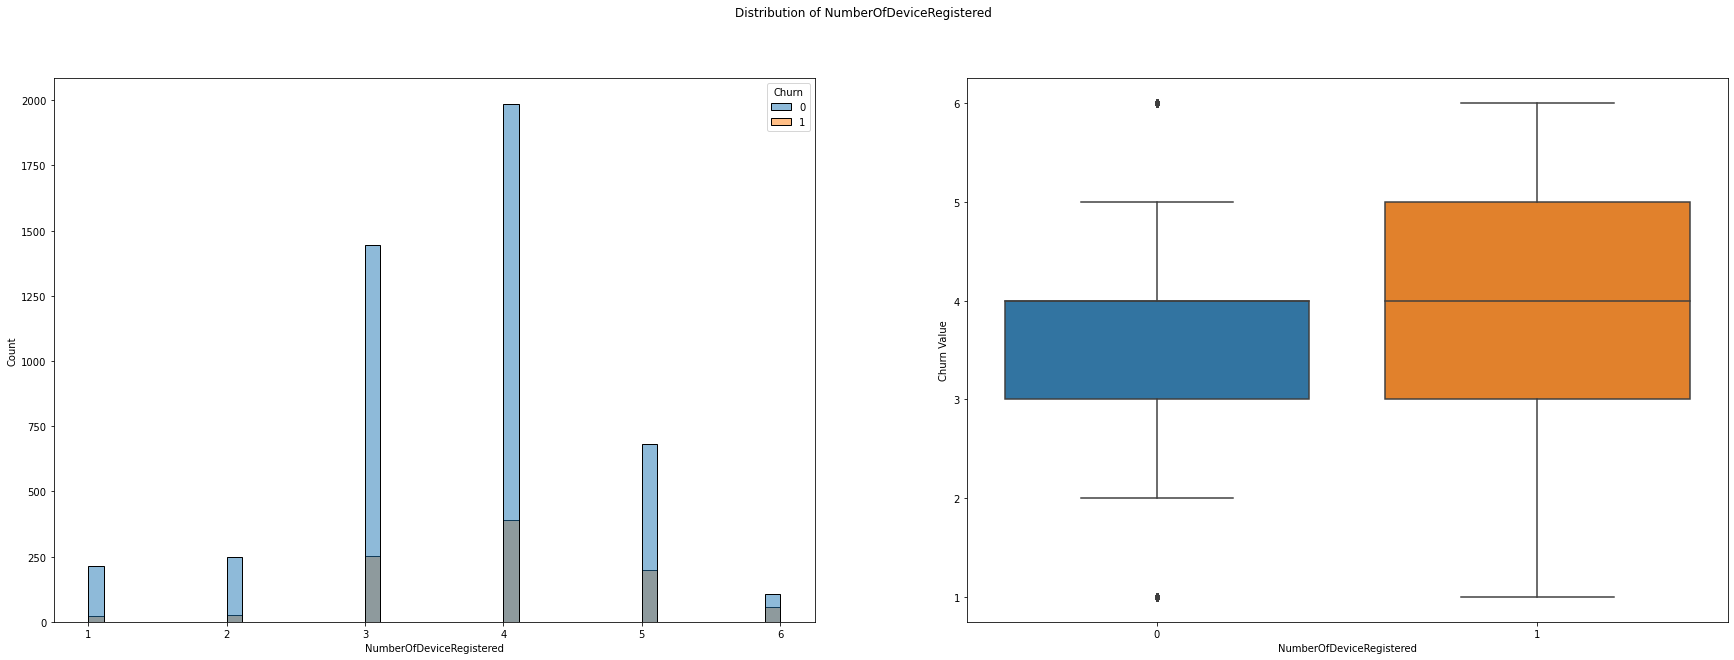

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,3.639257,1.018910,1.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,6.0,6.0
1,948.0,3.934599,1.014127,1.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,6.0,6.0


In [55]:

plot_numv_cr('NumberOfDeviceRegistered','Churn')
new_data.groupby('Churn')['NumberOfDeviceRegistered'].describe(percentiles=percentiles)





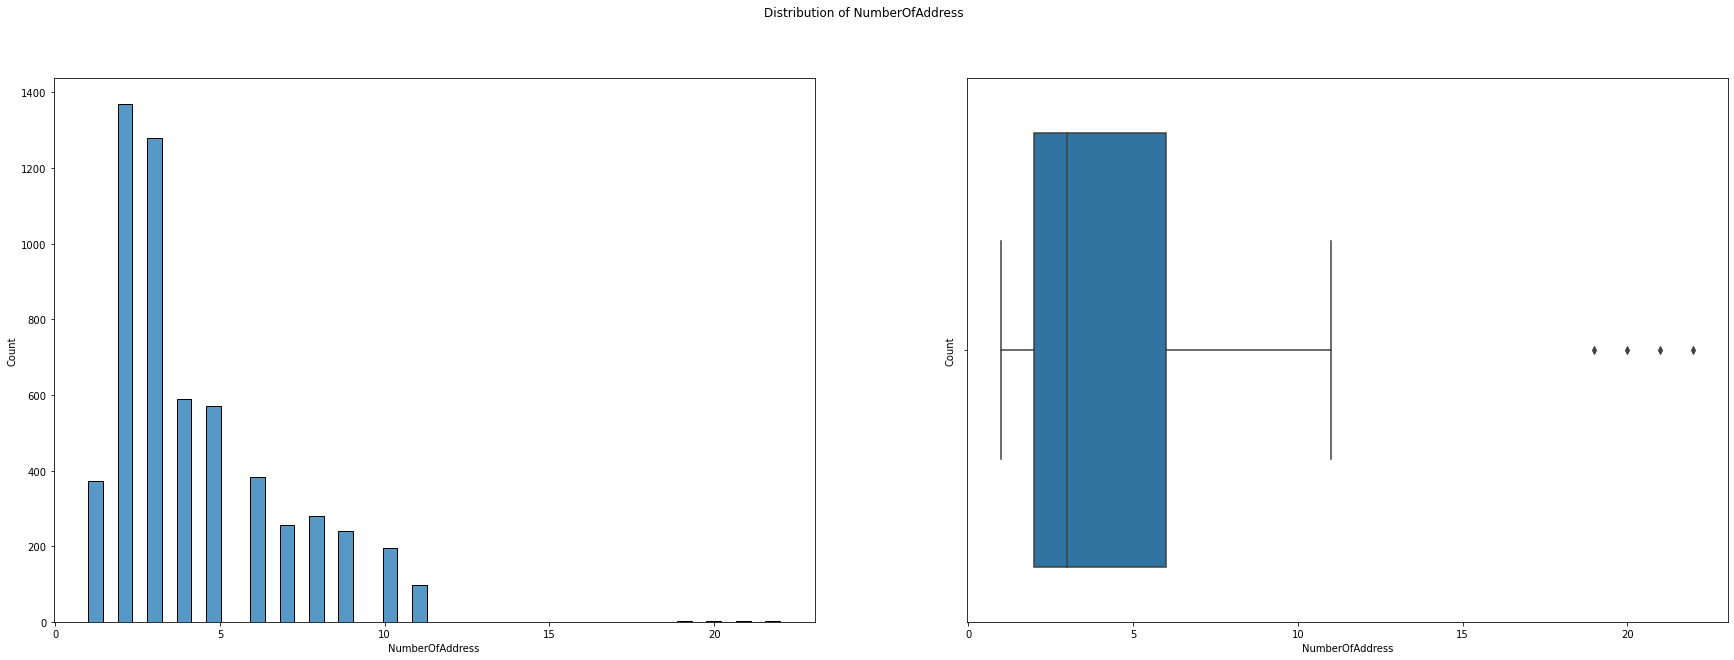

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,5.0,6.0,6.0,8.0,11.0,22.0


In [56]:


plot_numv('NumberOfAddress','Churn')
pd.DataFrame(new_data['NumberOfAddress'].describe(percentiles=percentiles)).T



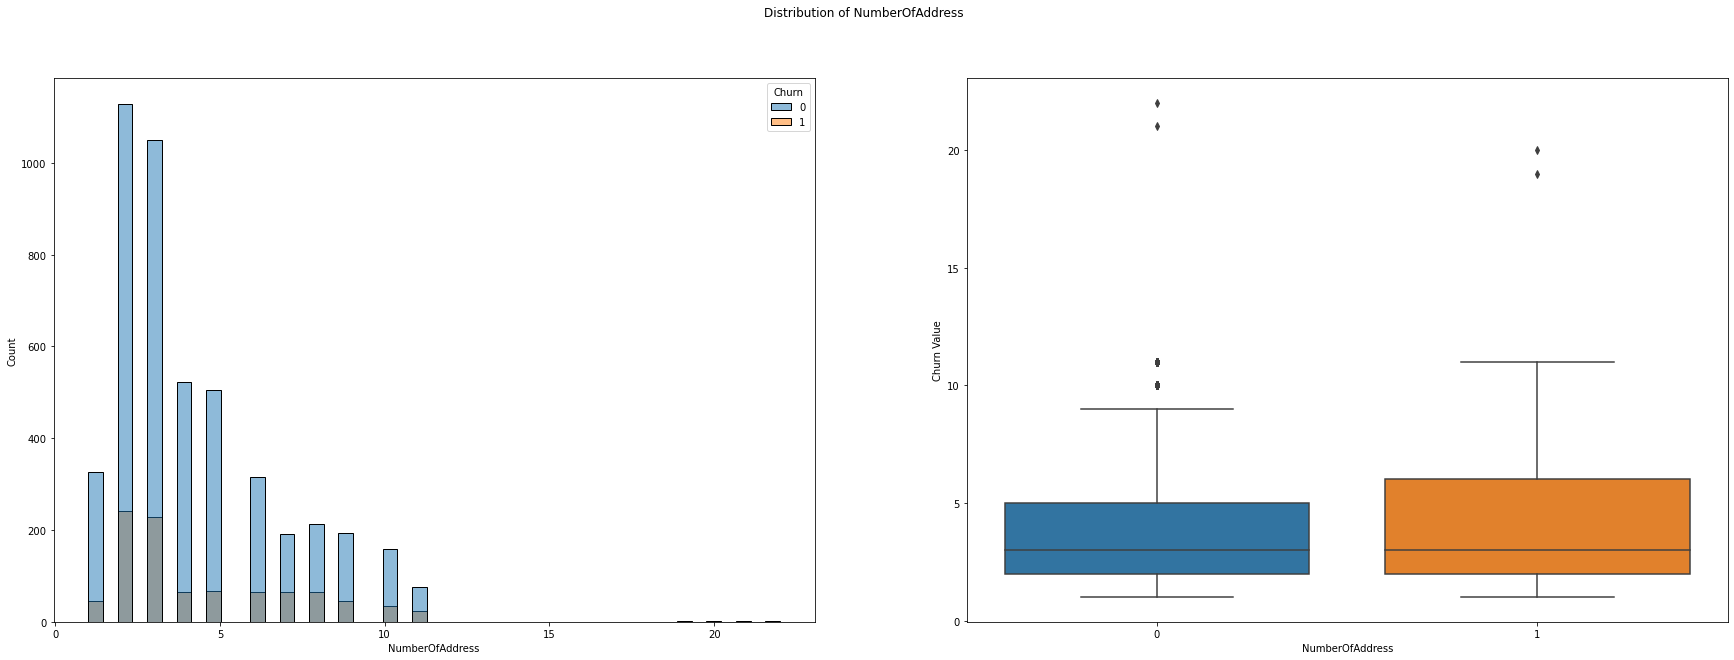

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,4.162965,2.537001,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,5.0,5.0,6.0,8.0,11.0,22.0
1,948.0,4.466245,2.790071,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,6.0,6.0,7.0,9.0,11.0,20.0


In [57]:

plot_numv_cr('NumberOfAddress','Churn')
new_data.groupby('Churn')['NumberOfAddress'].describe(percentiles=percentiles)


######  Handling Categorical Features by defining new functions

In [58]:

def plotting_percent(new_data, col, target, x_labels):
    x, y = col ,target
    
    tempdata = new_data.groupby(x)[y].value_counts(normalize=True)
    tempdata = tempdata.mul(100).rename('percent').reset_index()
    
    
    # For plotting figures
    v = sns.catplot(x = x, y = 'percent', hue = y,kind='bar', height = 6, aspect = 3, data = tempdata)
    v.ax.set_xticklabels(x_labels)
    v.ax.set_ylim(0, 100)
    
    for p in v.ax.patches:
        text = str(p.get_height().round(1)) + '%'
        text_x = p.get_x()
        text_y = p.get_height()
        v.ax.text(text_x,text_y,text)
        
    
    plt.title(f'{col.title()} By Percent {target.title()}')
    plt.xlabel(f'{col.title()}')
    
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize' : 20})
    
    return v
    

###### PreferredLoginDevice

In [59]:

new_data['PreferredLoginDevice'].unique()


array(['Mobile', 'Computer'], dtype=object)

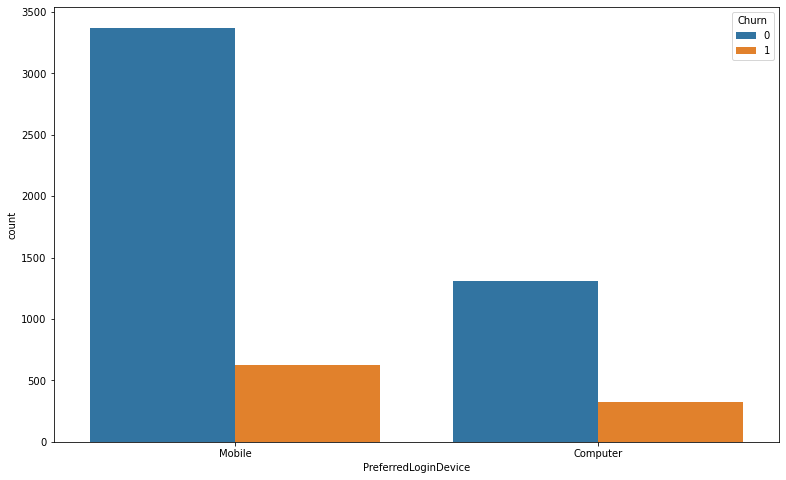

In [60]:

fig,ax = plt.subplots(figsize = (13, 8))
ax = sns.countplot(x = 'PreferredLoginDevice', hue='Churn', data=new_data)
plt.show()


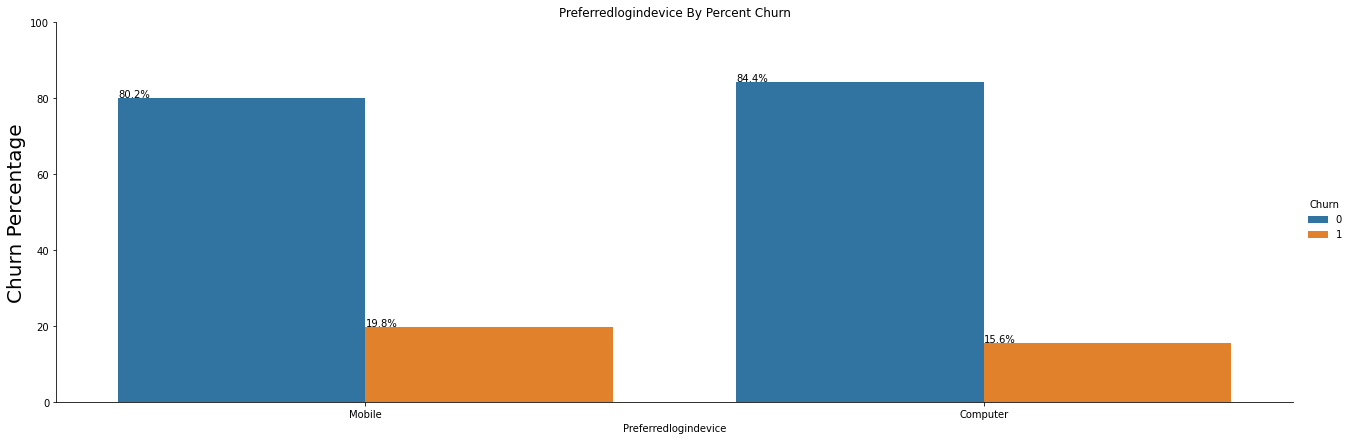

In [61]:

plotting_percent(new_data, 'PreferredLoginDevice','Churn', new_data.PreferredLoginDevice.unique())
plt.show()


###### CityTier

In [62]:

new_data['CityTier'].unique()


array([3, 1, 2])

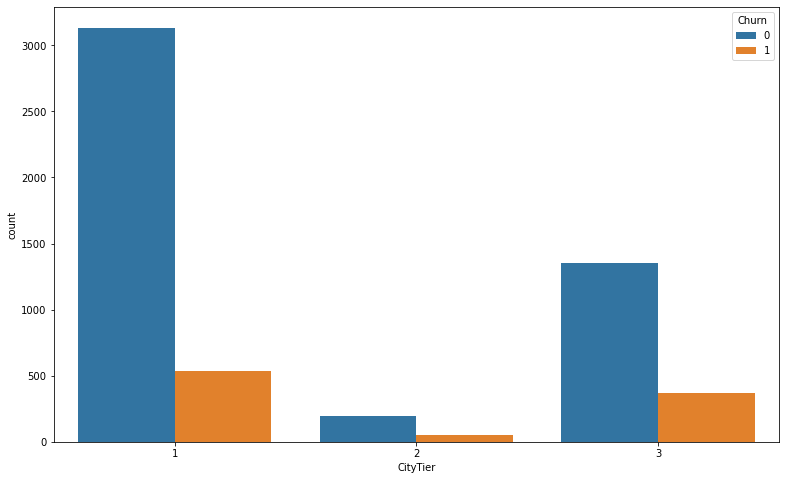

In [63]:

fig,ax = plt.subplots(figsize = (13, 8))
ax = sns.countplot(x = 'CityTier', hue='Churn', data=new_data)
plt.show()


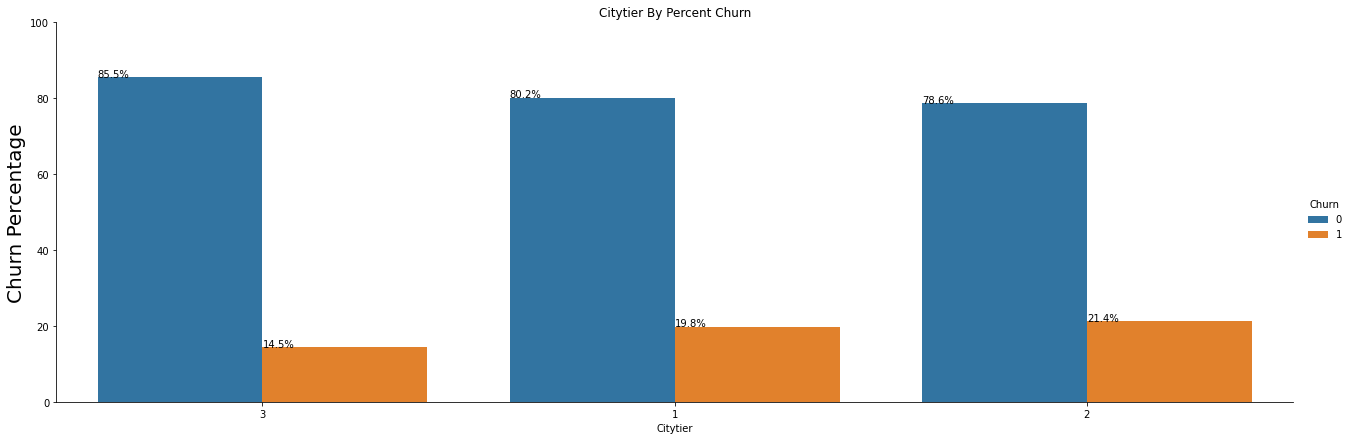

In [64]:

plotting_percent(new_data, 'CityTier','Churn', new_data.CityTier.unique())
plt.show()


###### PreferredPaymentMode

In [65]:

new_data['PreferredPaymentMode'].unique()


array(['DC', 'UPI', 'CC', 'COD', 'E wallet'], dtype=object)

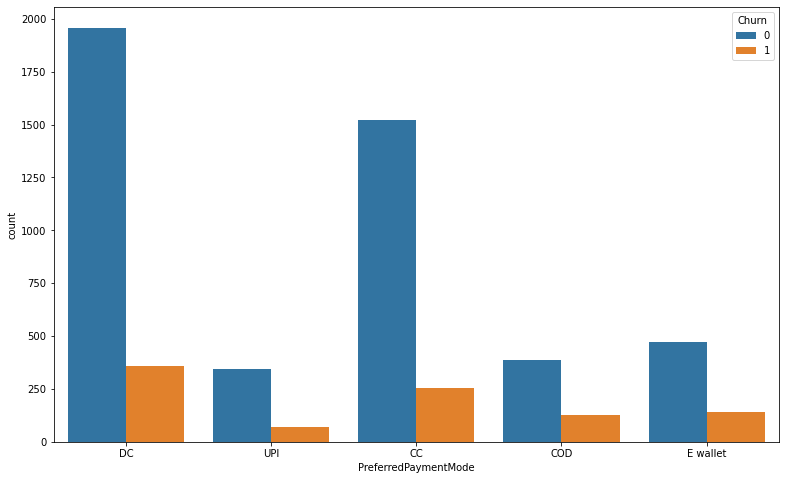

In [66]:

fig,ax = plt.subplots(figsize = (13, 8))
ax = sns.countplot(x = 'PreferredPaymentMode', hue='Churn', data=new_data)
plt.show()


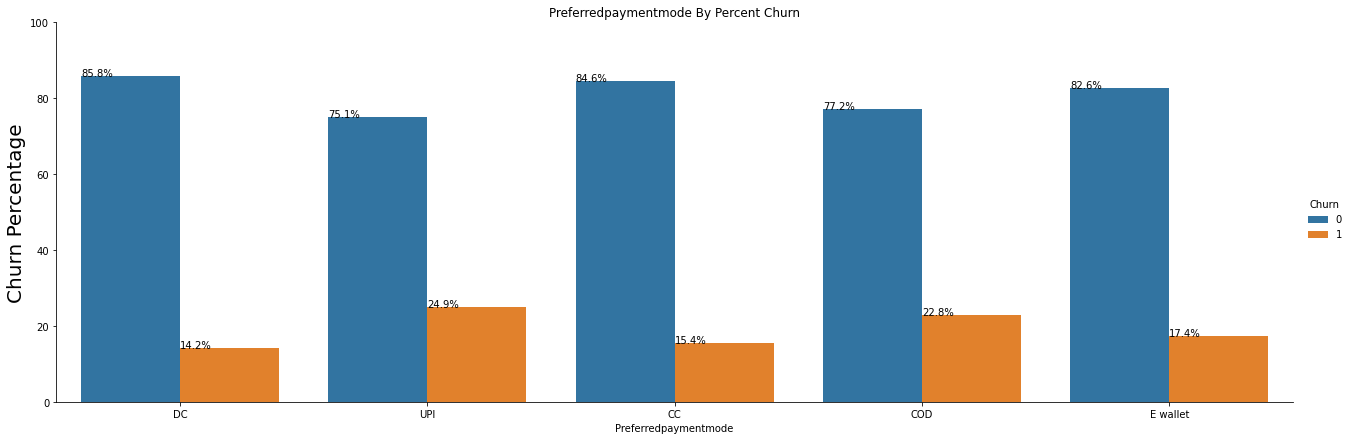

In [67]:

plotting_percent(new_data, 'PreferredPaymentMode','Churn', new_data.PreferredPaymentMode.unique())
plt.show()


###### Gender


In [68]:

new_data['Gender'].unique()


array(['Female', 'Male'], dtype=object)

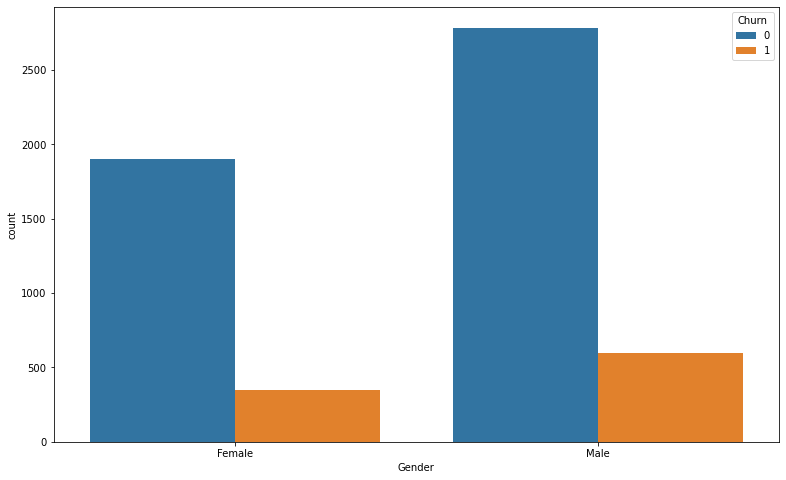

In [69]:

fig,ax = plt.subplots(figsize = (13, 8))
ax = sns.countplot(x = 'Gender', hue='Churn', data=new_data)
plt.show()


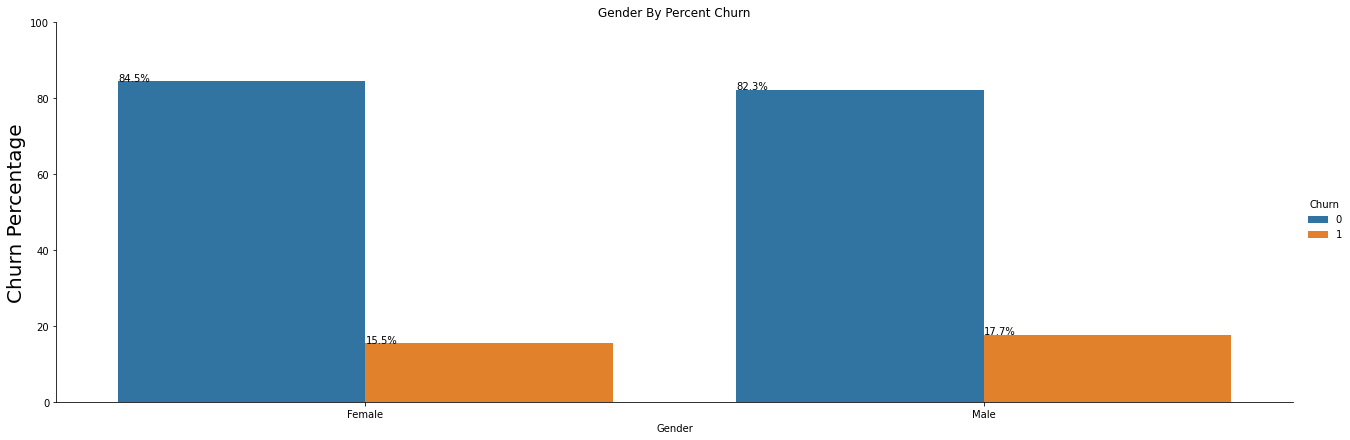

In [70]:

plotting_percent(new_data, 'Gender','Churn', new_data.Gender.unique())
plt.show()


###### PreferedOrderCat

In [71]:

new_data['PreferedOrderCat'].unique()


array(['Laptop', 'Mobile', 'Others', 'Fashion', 'Grocery'], dtype=object)

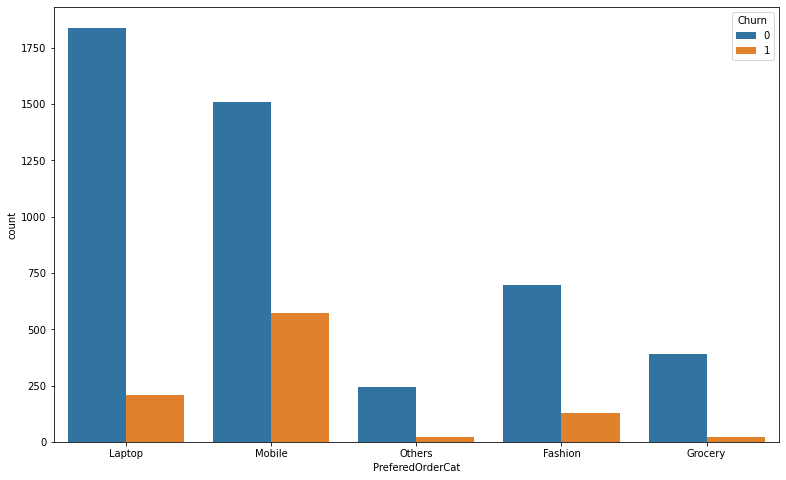

In [72]:

fig,ax = plt.subplots(figsize = (13, 8))
ax = sns.countplot(x = 'PreferedOrderCat', hue='Churn', data=new_data)
plt.show()


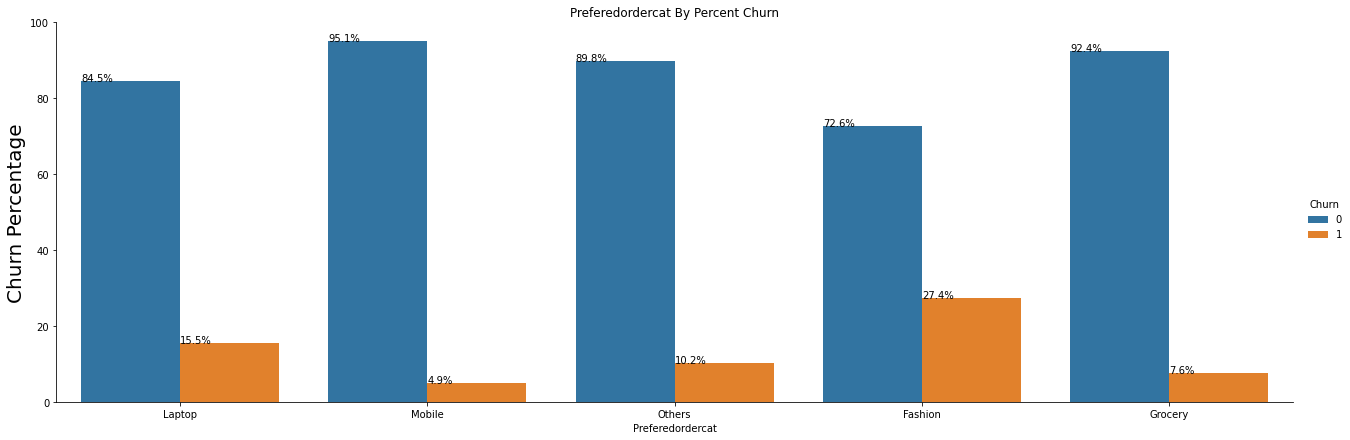

In [73]:

plotting_percent(new_data, 'PreferedOrderCat','Churn', new_data.PreferedOrderCat.unique())
plt.show()


###### SatisfactionScore

In [74]:

new_data['SatisfactionScore'].unique()


array([2, 3, 5, 4, 1])

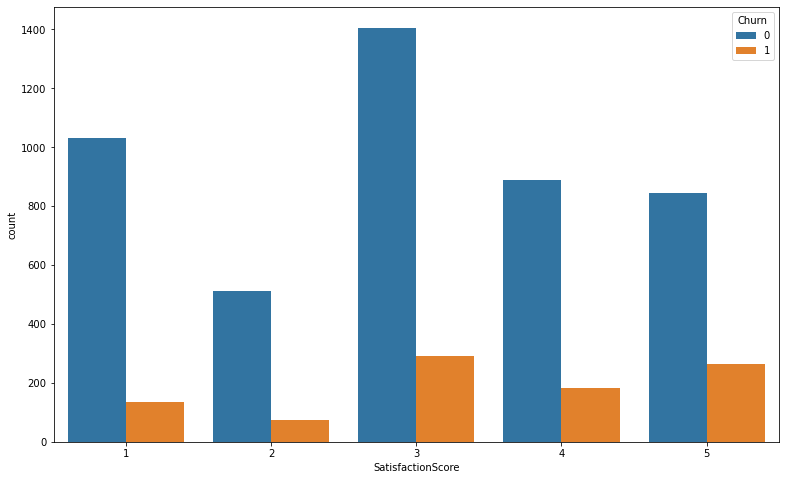

In [75]:

fig,ax = plt.subplots(figsize = (13, 8))
ax = sns.countplot(x = 'SatisfactionScore', hue='Churn', data=new_data)
plt.show()


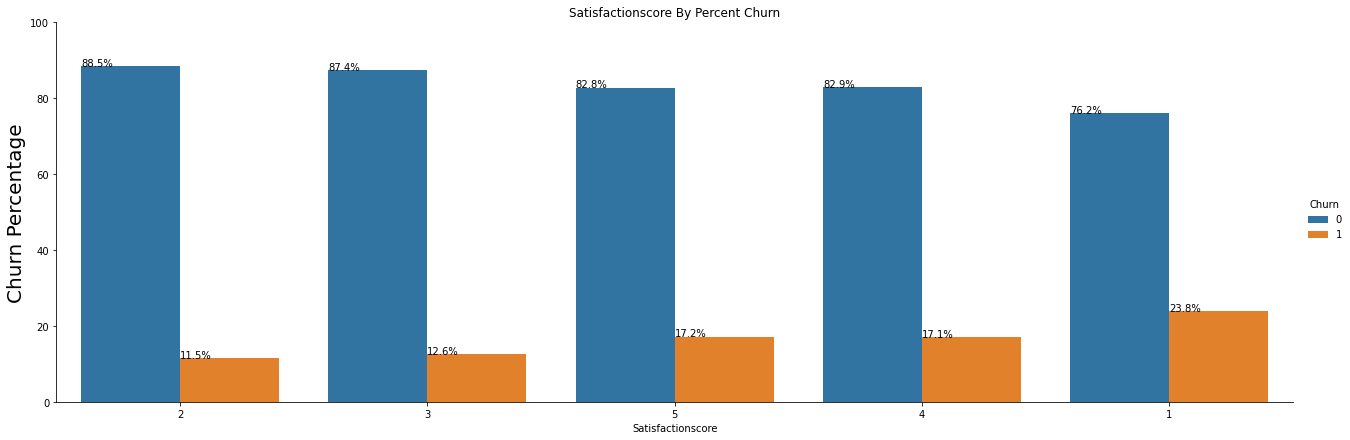

In [76]:

plotting_percent(new_data, 'SatisfactionScore','Churn', new_data.SatisfactionScore.unique())
plt.show()


###### MaritalStatus

In [77]:

new_data['MaritalStatus'].unique()


array(['Single', 'Divorced', 'Married'], dtype=object)

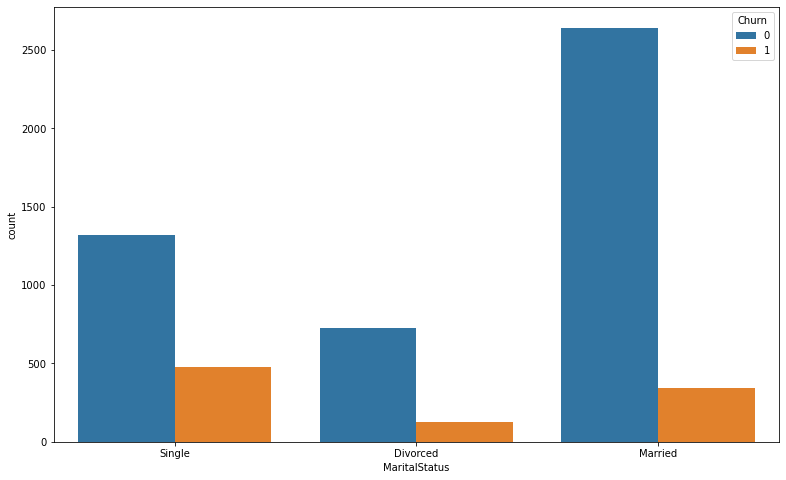

In [78]:

fig,ax = plt.subplots(figsize = (13, 8))
ax = sns.countplot(x = 'MaritalStatus', hue='Churn', data=new_data)
plt.show()


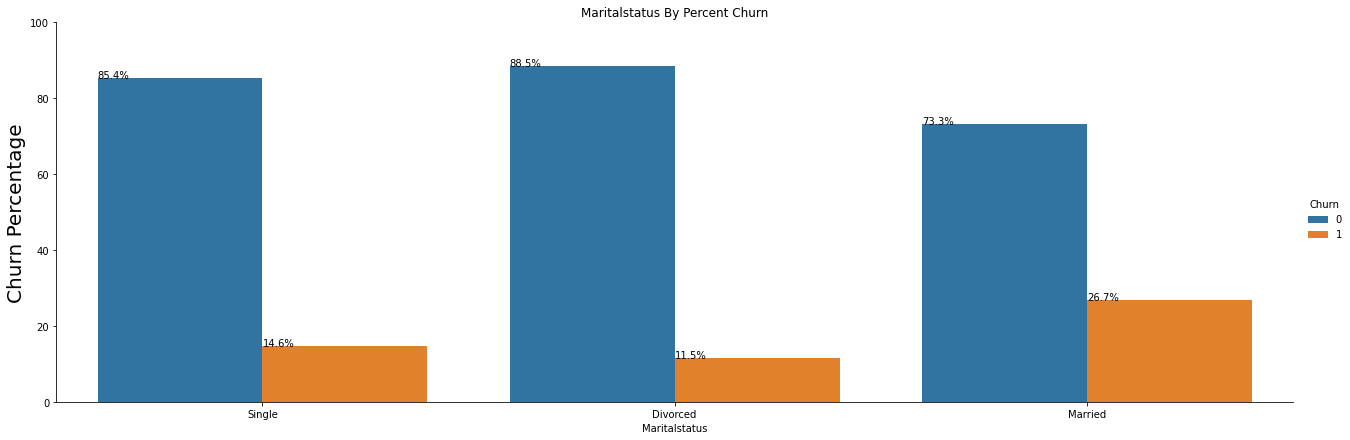

In [79]:

plotting_percent(new_data, 'MaritalStatus','Churn', new_data.MaritalStatus.unique())
plt.show()


###### Complain

In [80]:

new_data['Complain'].unique()


array([1, 0])

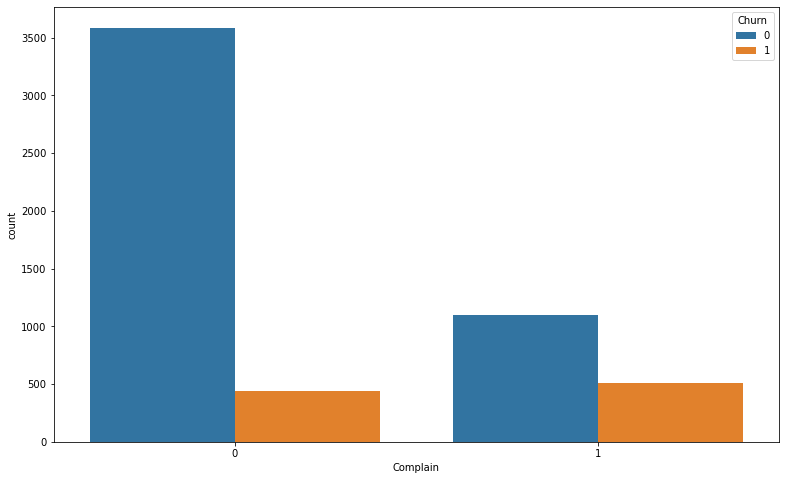

In [81]:

fig,ax = plt.subplots(figsize = (13, 8))
ax = sns.countplot(x = 'Complain', hue='Churn', data=new_data)
plt.show()


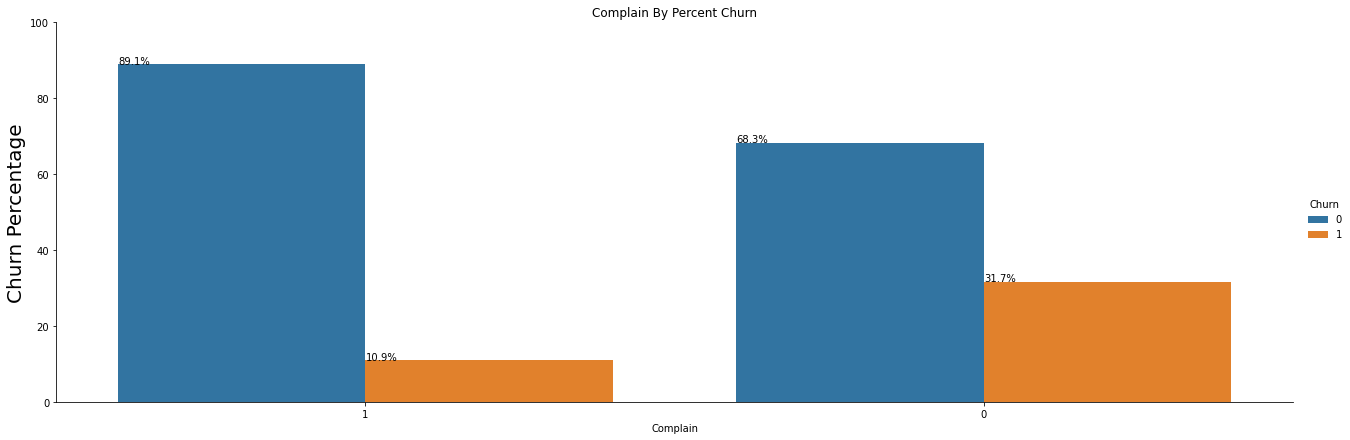

In [82]:

plotting_percent(new_data, 'Complain','Churn', new_data.Complain.unique())
plt.show()


###### Handling Outlier 


In [83]:

percentile = new_data.Tenure.quantile([0.99]).values
new_data['Tenure']= new_data['Tenure'].apply(lambda x : percentile[0] if x > percentile[0] else x)


In [84]:

percentile = new_data.DaySinceLastOrder.quantile([0.99]).values
new_data['DaySinceLastOrder']= new_data['DaySinceLastOrder'].apply(lambda x : percentile[0] if x > percentile[0] else x)
